# Programming language

**Julia 1.6.5**

**R 4.2.0** (imported into Julia through RCall.jl)

In [3]:
using Plots; pyplot()
using Plots.Measures
using DelimitedFiles, DataFrames, CSV, JLD
using StatsBase, Distributions, GLM
using Combinatorics
using ProgressMeter
using RCall
using LaTeXStrings
using LsqFit
using KernelDensity
using SpecialFunctions

In [4]:
dir_source_data = "/n/holyscratch01/mallet_lab/txiong/Research/2022_HybridSterility/Manuscript_SourceData/SourceData"

@rput dir_source_data

"/n/holyscratch01/mallet_lab/txiong/Research/2022_HybridSterility/Manuscript_SourceData/SourceData"

## 1. Scripts to convert input files from r/qtl2 to r/qtl

(no need to run since we have already provided all files ready for r/qtl and r/qtl2)

In [2]:
dir_data = "/n/holyscratch01/mallet_lab/txiong/Research/2022_HybridSterility/07_qtl.rqtl2/data"

cd(dir_data)


In [3]:
dir_run = "matD/run.pheno_allOvaryPhenotypes"

df_geno = DataFrame(CSV.File("$(dir_run)/genotypes.csv",header=false))

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,String15,String7,String7,String15,String15,String15,String15,String15,String15
1,id,1_30435,1_31161,1_508823,1_523423,1_524099,1_714603,1_714658,1_714692
2,D(DB)001,DD,DD,DD,DD,DD,DD,DD,DD
3,D(DB)008,DB,DB,DB,DB,DB,DB,DB,DB
4,D(DB)009,DB,DB,DB,DB,DB,DB,DB,DB
5,D(DB)010,DD,DD,DD,DD,DD,DD,DD,DD
6,D(DB)015,DB,DB,DB,DB,DB,DB,DB,DB
7,D(DB)017,DD,DD,DD,DD,DD,DD,DD,DD
8,D(DB)018,DD,DD,DD,DD,DD,DD,DD,DD
9,D(DB)023,DD,DD,DD,DD,DD,DD,DD,DD


In [4]:
df_genmap = DataFrame(CSV.File("$(dir_run)/map.genetic.csv",header=true))

,marker,chr,pos
,String15,Int64,Float64
1,1_30435,1,0.0
2,1_31161,1,0.746
3,1_508823,1,1.049
4,1_523423,1,1.352
5,1_524099,1,1.655
6,1_714603,1,1.958
7,1_714658,1,2.261
8,1_714692,1,2.564
9,1_838748,1,2.867


In [5]:
chr_line = string.(vcat([""],df_genmap[!,2]))
map_line = string.(vcat([""],df_genmap[!,3]));

In [6]:
open("$(dir_run)/rqtl.genotypes.csv","w") do f
    
    write(f,join(Array(df_geno[1,:]),","))
    write(f,"\n")
    write(f,join(chr_line,","))
    write(f,"\n")
    write(f,join(map_line,","))
    write(f,"\n")
    
    for i in 2:size(df_geno)[1]
        write(f,join(Array(df_geno[i,:]),","))
        write(f,"\n")
    end
    
end

In [7]:
df_pheno = DataFrame(CSV.File("$(dir_run)/phenotypes.csv",header=false))

,Column1,Column2,Column3,Column4,Column5,Column6,Column7
,String15,String15,String15,String15,String15,String15,String15
1,id,Dimi_InAmb,Dimi_ExAmb,Good_InAmb,Good_ExAmb,Jamm_InAmb,Jamm_ExAmb
2,D(DB)001,0,0,1,1,0,0
3,D(DB)008,0,0,0,0,1,1
4,D(DB)009,0,0,0,0,1,1
5,D(DB)010,0,0,0,0,1,1
6,D(DB)015,0,0,1,1,0,0
7,D(DB)017,1,1,0,0,0,0
8,D(DB)018,1,1,0,0,0,0
9,D(DB)023,1,0,1,0,0,0


## 2. QTL analysis - Part 1

**Software:** r/qtl2 and r/qtl

**Individuals:** backcross females with a *P. bianor* mother

### 2.1. Ovary: phenotype Empty

**Individuals:** all females from B(BD) and B(DB)

In [20]:
R"""

library("qtl2")

setwd(paste(dir_source_data,"/FigS15/FigS15A/run.pheno_empty",sep=""))

matB <- read_cross2("control.yaml")

gmap = matB$gmap
pmap = matB$pmap
pheno = matB$pheno

pr <- calc_genoprob(matB, gmap, map_function="morgan", error_prob=0.002)

out <- scan1(pr, pheno, model="binary")

operm <- scan1perm(pr, pheno, n_perm=1000)

"""

println("Mapping finished!")

┌ Warning: RCall.jl: Warning in readLines(con, warn = readLines.warn) :
│   incomplete final line found on 'control.yaml'
└ @ RCall /n/home00/txiong/.julia/packages/RCall/6kphM/src/io.jl:172


Mapping finished!


In [21]:
map = @rget pmap
out = @rget out

R"s_operm <- summary(operm)"

s_operm = @rget s_operm;

In [22]:
markersizes = []
for chr in 1:30
    push!(markersizes,size(map[Symbol("$(chr)")])[1])
end
marker_idx_range = vcat([0],cumsum(markersizes));

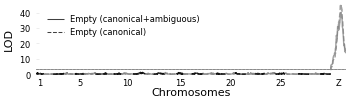

In [23]:
fig = plot(size=(350,100))
colors=[:gray,:black]
for chr in 1:30
    if chr == 1
        pos = map[Symbol("$(chr)")]
    else
        pos = map[Symbol("$(chr)")] .+ sum([map[Symbol("$(i)")][end] for i in 1:(chr-1)])
    end
    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],1],
        label=chr == 1 ? "Empty (canonical+ambiguous)" : "",
        legendfontsize=6,
        legend=:topleft,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        xticks=[],
        linewidth=1,
        linealpha=0.75,
        ylims=(-0.5,+Inf),
        xlims=(-Inf,+Inf),
        grid=:off,
        ylabel="LOD",
        yguidefontsize=8,
        ytickfontsize=6,
        framestyle=:grid,
        bottom_margin=0.5cm,
        )
    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],2],
        label=chr == 1 ? "Empty (canonical)" : "",
        linecolor=colors[chr%2+1],
        xticks=[],
        linewidth=1,
        linealpha=0.75,
        linestyle=:dash,
        ylims=(-0.5,+Inf),
        grid=:off,
        ylabel="LOD",
        bottom_margin=0.5cm,
        )
    if any(chr .== [1,5,10,15,20,25,30])
        annotate!(fig,[(mean([pos[1],pos[end]]),-6,Plots.text(chr!=30 ? "$(chr)" : "Z",6))])
    end
    if chr == 30
        annotate!(fig,[(pos[end]/2,-12,Plots.text("Chromosomes",8))])
    end
end

hline!(fig,[s_operm[1]],
    linecolor=:gray,
    linewidth=0.5,
    label="",
    linestyle=:solid)
hline!(fig,[s_operm[2]],
    linecolor=:gray,
    linewidth=0.5,
    label="",
    linestyle=:dash)

fig

In [24]:
R"peaks <- find_peaks(out, pmap, threshold=5, prob=0.95)"

RObject{VecSxp}
  lodindex              lodcolumn chr      pos      lod    ci_lo    ci_hi
1        1 Empty_IncludeAmbiguous  30 12.18279 40.12502 11.64904 12.25411
2        2 Empty_ExcludeAmbiguous  30 11.45892 45.56313 11.37611 12.25411


**Note**

lodindex 1: the peak is for the interval $[11.458917,11.536238]$

lodindex 2: the peak is for the interval $[12.182791,12.254113]$

In [25]:
dir_output = "$(dir_source_data)/FigS15/FigS15A"

fig_name = "lod_score"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

### 2.2. Ovary: phenotype Normal

**Individuals:** females from B(BD) and B(DB) with Z chromosomes being pure *bianor*

In [14]:
R"""

library("qtl2")

setwd(paste(dir_source_data,"/FigS15/FigS15B/run.pheno_normal.Z_pureB",sep=""))

matB <- read_cross2("control.yaml")

gmap = matB$gmap
pmap = matB$pmap
pheno = matB$pheno

pr <- calc_genoprob(matB, gmap, map_function="morgan", error_prob=0.002)

out <- scan1(pr, pheno, model="binary")

operm <- scan1perm(pr, pheno, n_perm=1000)

"""

println("Mapping finished!")

┌ Warning: RCall.jl: Warning in readLines(con, warn = readLines.warn) :
│   incomplete final line found on 'control.yaml'
└ @ RCall /n/home00/txiong/.julia/packages/RCall/6kphM/src/io.jl:172


Mapping finished!


In [15]:
map = @rget pmap
out = @rget out

R"s_operm <- summary(operm)"

s_operm = @rget s_operm;

In [16]:
markersizes = []
for chr in 1:29
    push!(markersizes,size(map[Symbol("$(chr)")])[1])
end
marker_idx_range = vcat([0],cumsum(markersizes));

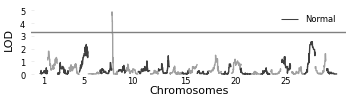

In [17]:
fig = plot(size=(350,100))
colors=[:gray,:black]
for chr in 1:29
    if chr == 1
        pos = map[Symbol("$(chr)")]
    else
        pos = map[Symbol("$(chr)")] .+ sum([map[Symbol("$(i)")][end] for i in 1:(chr-1)])
    end

    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],2],
        label=chr==1 ? "Normal" : "",
        legend=:topright,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        xticks=[],
        linewidth=1,
        linealpha=0.75,
        ylims=(-0.05,5.5),
        grid=:off,
        ylabel="LOD",
        yguidefontsize=8,
        ytickfontsize=6,
        legendfontsize=6,
        framestyle=:grid,
        bottom_margin=0.5cm,
        )
    if any(chr .== [1,5,10,15,20,25,30])
        annotate!(fig,[(mean([pos[1],pos[end]]),-0.6,Plots.text(chr!=30 ? "$(chr)" : "Z",6))])
    end
    if chr == 29
        annotate!(fig,[(pos[end]/2,-1.3,Plots.text("Chromosomes",8))])
    end
end

hline!(fig,[s_operm[2]],
    linecolor=:gray,
    linewidth=1,
    label="",
    linestyle=:solid)

fig

In [18]:
R"peaks <- find_peaks(out, pmap, threshold=4, prob=0.95)"

RObject{VecSxp}
  lodindex               lodcolumn chr      pos      lod    ci_lo    ci_hi
1        2 Normal_ExcludeAmbiguous   8 0.366353 4.875207 0.005916 0.784124


In [19]:
dir_output = "$(dir_source_data)/FigS15/FigS15B"

fig_name = "lod_score"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

### 2.3. Pupal weights

**Covariates:** using broods as individual covariates

broods = individuals reared at the same time of the year

**Individuals:** all females from B(BD)

In [27]:
R"""

library("qtl2")

setwd(paste(dir_source_data,"/Fig3+S8toS10/Fig3A_3B_3C_3D_3E/run.pheno_pupalWeight_BBD",sep=""))

matB <- read_cross2("control.yaml")

pmap = matB$pmap
gmap = matB$gmap
pheno = matB$pheno

pr <- calc_genoprob(matB, gmap, error_prob=0.002)

covar <- match(matB$covar$Brood, c("I", "II","III","IV"))
names(covar) <- rownames(matB$covar)

out <- scan1(pr, pheno, addcovar=covar)

operm <- scan1perm(pr, matB$pheno, n_perm=1000)

"""

println("Mapping finished!")

Mapping finished!


In [28]:
map = @rget pmap
out = @rget out

R"s_operm <- summary(operm)"

s_operm = @rget s_operm;

In [29]:
markersizes = []
for chr in 1:30
    push!(markersizes,size(map[Symbol("$(chr)")])[1])
end
marker_idx_range = vcat([0],cumsum(markersizes));

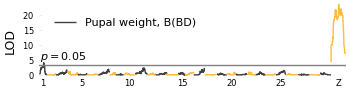

In [30]:
fig = plot(size=(350,100))
colors=[:orange,:black]
for chr in 1:30
    if chr == 1
        pos = map[Symbol("$(chr)")]
    else
        pos = map[Symbol("$(chr)")] .+ sum([map[Symbol("$(i)")][end] for i in 1:(chr-1)])
    end

    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],1],
        label=chr==1 ? "Pupal weight, B(BD)" : "",
        legendfontsize=8,
        legend=:topleft,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        xticks=[],
        linewidth=1,
        linealpha=0.75,
        ylims=(-1,+Inf),
        xlims=(-Inf,+Inf),
        grid=:off,
        ylabel="LOD",
        # xlabel="Chromosomes",
        yguidefontsize=9,
        xguidefontsize=9,
        ytickfontsize=6,
        framestyle=:grid,
        bottom_margin=0.5cm,
        )
    if any(chr .== [1,5,10,15,20,25,30])
        annotate!(fig,[(mean([pos[1],pos[end]]),-3,Plots.text(chr!=30 ? "$(chr)" : "Z",6))])
    end
end

hline!(fig,[s_operm[1]],
    linecolor=:gray,
    linewidth=1,
    label="",
    linestyle=:solid)

lod_threshold = string(round(s_operm[1];digits=2))

annotate!(fig,[(1,6,Plots.text(string(L"p=0.05"),8,:left))])

fig

In [31]:
R"peaks <- find_peaks(out, pmap, threshold=3.5, prob=0.95)"

RObject{VecSxp}
  lodindex    lodcolumn chr      pos       lod    ci_lo     ci_hi
1        1 Pupal_Weight   1 5.162224  4.016472 2.310178  6.515355
2        1 Pupal_Weight  30 9.124007 23.609275 9.124007 12.254113


In [32]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "lod_score_BBD"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

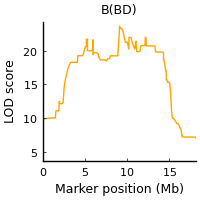

In [38]:
## Alternative figures for LOD scores

lod1scan = out[marker_idx_range[30]+1:marker_idx_range[30+1],1]

fig = plot(size=(200,200),layout=(1,1))

plot!(fig,pmap[Symbol("30")],lod1scan,
    grid=:off,
    ylabel="LOD score",
    xlabel="Marker position (Mb)",
    yguidefontsize=9,
    xguidefontsize=9,
    xlims=(0,+Inf),
    label="",
    linecolor=:orange,
    title="B(BD)",
    titlefontsize=9,
    subplot=1)


In [40]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "BBD.1D.Z.lod_score"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

## 3. QTL analysis - Part 2

**Software:** r/qtl2 and r/qtl

**Individuals:** backcross females with a *P. dehaanii* mother

### 3.1. Pupal weights

**Covariates:** using broods as individual covariates

broods = individuals reared at the same time of the year

**Individuals:** all females from D(DB)

In [41]:
R"""

library("qtl2")

setwd(paste(dir_source_data,"/Fig3+S8toS10/Fig3A_3B_3C_3D_3E/run.pheno_pupalWeight_DDB",sep=""))

matD <- read_cross2("control.yaml")

pmap = matD$pmap
gmap = matD$gmap
pheno = matD$pheno

pr <- calc_genoprob(matD, gmap, error_prob=0.002)

covar <- match(matD$covar$Brood, c("I", "II","III","IV"))
names(covar) <- rownames(matD$covar)

out <- scan1(pr, pheno, addcovar=covar)

operm <- scan1perm(pr, matD$pheno, n_perm=1000)

"""

println("Mapping finished!")

Mapping finished!


In [42]:
map = @rget pmap
out = @rget out

R"s_operm <- summary(operm)"

s_operm = @rget s_operm;

In [43]:
markersizes = []
for chr in 1:30
    push!(markersizes,size(map[Symbol("$(chr)")])[1])
end
marker_idx_range = vcat([0],cumsum(markersizes));

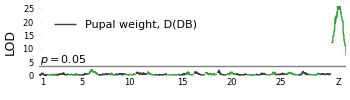

In [44]:
fig = plot(size=(350,100))
colors=[:green,:black]
for chr in 1:30
    if chr == 1
        pos = map[Symbol("$(chr)")]
    else
        pos = map[Symbol("$(chr)")] .+ sum([map[Symbol("$(i)")][end] for i in 1:(chr-1)])
    end

    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],1],
        label=chr==1 ? "Pupal weight, D(DB)" : "",
        legendfontsize=8,
        legend=:topleft,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        xticks=[],
        linewidth=1,
        linealpha=0.75,
        ylims=(-1,+Inf),
        xlims=(-Inf,+Inf),
        grid=:off,
        ylabel="LOD",
        # xlabel="Chromosomes",
        yguidefontsize=9,
        xguidefontsize=9,
        ytickfontsize=6,
        framestyle=:grid,
        bottom_margin=0.5cm,
        )
    if any(chr .== [1,5,10,15,20,25,30])
        annotate!(fig,[(mean([pos[1],pos[end]]),-3,Plots.text(chr!=30 ? "$(chr)" : "Z",6))])
    end
end

hline!(fig,[s_operm[1]],
    linecolor=:gray,
    linewidth=1,
    label="",
    linestyle=:solid)

lod_threshold = string(round(s_operm[1];digits=2))

annotate!(fig,[(1,5.5,Plots.text(string(L"p=0.05"),8,:left))])

fig

In [45]:
R"peaks <- find_peaks(out, pmap, threshold=3.5, prob=0.95)"

RObject{VecSxp}
  lodindex    lodcolumn chr      pos      lod    ci_lo    ci_hi
1        1 Pupal_Weight  30 11.06879 25.73235 7.855832 11.37611


In [46]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "lod_score_DDB"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

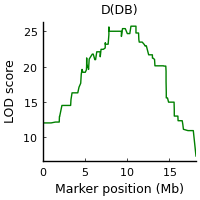

In [47]:
## Alternative figures for LOD scores

lod1scan = out[marker_idx_range[30]+1:marker_idx_range[30+1],1]

fig = plot(size=(200,200),layout=(1,1))

plot!(fig,pmap[Symbol("30")],lod1scan,
    grid=:off,
    ylabel="LOD score",
    xlabel="Marker position (Mb)",
    yguidefontsize=9,
    xguidefontsize=9,
    xlims=(0,+Inf),
    label="",
    linecolor=:green,
    title="D(DB)",
    titlefontsize=9,
    subplot=1)


In [49]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "DDB.1D.Z.lod_score"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

### 3.2. Ovary: phenotypes Diminished, Normal, and Jammed

**Individuals:** all females from D(DB)

In [50]:
R"""

library("qtl2")

setwd(paste(dir_source_data,"/Fig4-Papilio+S13/run.pheno_allOvaryPhenotypes",sep=""))

matD <- read_cross2("control.yaml")

pmap = matD$pmap
gmap = matD$gmap
pheno = matD$pheno

pr <- calc_genoprob(matD, gmap, error_prob=0.002)

out <- scan1(pr, pheno, model="binary")

operm <- scan1perm(pr, matD$pheno, n_perm=1000)

"""

println("Mapping finished!")

Mapping finished!


In [51]:
map = @rget pmap
out = @rget out

R"s_operm <- summary(operm)"

s_operm = @rget s_operm;

In [52]:
markersizes = []
for chr in 1:30
    push!(markersizes,size(map[Symbol("$(chr)")])[1])
end
marker_idx_range = vcat([0],cumsum(markersizes));

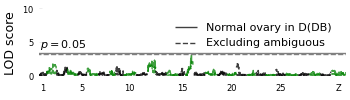

In [55]:
fig = plot(size=(350,100))
colors=[:green,:black]
for chr in 1:30
    if chr == 1
        pos = map[Symbol("$(chr)")]
    else
        pos = map[Symbol("$(chr)")] .+ sum([map[Symbol("$(i)")][end] for i in 1:(chr-1)])
    end

    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],3],
        label=chr==1 ? "Normal ovary in D(DB)" : "",
        legendfontsize=8,
        legend=:topleft,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        xticks=[],
        linewidth=1,
        linealpha=0.75,
        ylims=(0,1.5),
        xlims=(-Inf,+Inf),
        grid=:off,
        ylabel="LOD",
        # xlabel="Chromosomes",
        xguidefontsize=9,
        yguidefontsize=9,
        ytickfontsize=6,
        # framestyle=:axes,
        bottom_margin=0.5cm,
        )
    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],4],
        label=chr==1 ? "Excluding ambiguous" : "",
        legendfontsize=8,
        legend=:topright,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        linestyle=:dash,
        xticks=[],
        yticks=[0,5,10],
        linewidth=1,
        linealpha=0.75,
        ylims=(-0.5,10),
        xlims=(-Inf,+Inf),
        grid=:off,
        ylabel="LOD score",
        ytickfontsize=6,
        framestyle=:grid,
        bottom_margin=0.5cm,
        )
    if any(chr .== [1,5,10,15,20,25,30])
        annotate!(fig,[(mean([pos[1],pos[end]]),-2,Plots.text(chr!=30 ? "$(chr)" : "Z",6))])
    end
    if chr == 29
        # annotate!(fig,[(pos[end]/2,-4,Plots.text("Chromosomes",8))])
    end
end

hline!(fig,[s_operm[3]],
    linecolor=:gray,
    linewidth=1,
    label="",
    linestyle=:solid)

hline!(fig,[s_operm[4]],
    linecolor=:gray,
    linewidth=1,
    label="",
    linestyle=:dash)

lod_threshold_1 = string(round(s_operm[5];digits=2))
lod_threshold_2 = string(round(s_operm[6];digits=2))

annotate!(fig,[(1,4.5,Plots.text(string(L"p=0.05"),8,:left))])


fig

In [56]:
dir_output = "$(dir_source_data)/Fig4-Papilio+S13"

fig_name = "lod_score_Normal"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

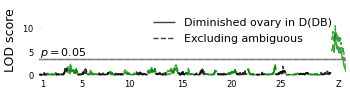

In [58]:
fig = plot(size=(350,100))
colors=[:green,:black]
for chr in 1:30
    if chr == 1
        pos = map[Symbol("$(chr)")]
    else
        pos = map[Symbol("$(chr)")] .+ sum([map[Symbol("$(i)")][end] for i in 1:(chr-1)])
    end

    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],1],
        label=chr==1 ? "Diminished ovary in D(DB)" : "",
        legendfontsize=8,
        legend=:topleft,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        xticks=[],
        linewidth=1,
        linealpha=0.75,
        ylims=(0,1.5),
        xlims=(-Inf,+Inf),
        grid=:off,
        ylabel="LOD",
        # xlabel="Chromosomes",
        xguidefontsize=9,
        yguidefontsize=9,
        ytickfontsize=6,
        # framestyle=:axes,
        bottom_margin=0.5cm,
        )
    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],2],
        label=chr==1 ? "Excluding ambiguous" : "",
        legendfontsize=8,
        legend=:topright,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        linestyle=:dash,
        xticks=[],
        yticks=[0,5,10],
        linewidth=1,
        linealpha=0.75,
        ylims=(-0.5,15),
        xlims=(-Inf,+Inf),
        grid=:off,
        ylabel="LOD score",
        ytickfontsize=6,
        framestyle=:grid,
        bottom_margin=0.5cm,
        )
    if any(chr .== [1,5,10,15,20,25,30])
        annotate!(fig,[(mean([pos[1],pos[end]]),-2,Plots.text(chr!=30 ? "$(chr)" : "Z",6))])
    end
    if chr == 29
        # annotate!(fig,[(pos[end]/2,-4,Plots.text("Chromosomes",8))])
    end
end

hline!(fig,[s_operm[1]],
    linecolor=:gray,
    linewidth=1,
    label="",
    linestyle=:solid)

hline!(fig,[s_operm[2]],
    linecolor=:gray,
    linewidth=1,
    label="",
    linestyle=:dash)

lod_threshold_1 = string(round(s_operm[5];digits=2))
lod_threshold_2 = string(round(s_operm[6];digits=2))

annotate!(fig,[(1,4.5,Plots.text(string(L"p=0.05"),8,:left))])


fig

In [59]:
dir_output = "$(dir_source_data)/Fig4-Papilio+S13"

fig_name = "lod_score_Diminished"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

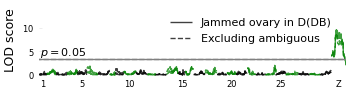

In [61]:
fig = plot(size=(350,100))
colors=[:green,:black]
for chr in 1:30
    if chr == 1
        pos = map[Symbol("$(chr)")]
    else
        pos = map[Symbol("$(chr)")] .+ sum([map[Symbol("$(i)")][end] for i in 1:(chr-1)])
    end

    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],5],
        label=chr==1 ? "Jammed ovary in D(DB)" : "",
        legendfontsize=8,
        legend=:topleft,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        xticks=[],
        linewidth=1,
        linealpha=0.75,
        ylims=(0,1.5),
        xlims=(-Inf,+Inf),
        grid=:off,
        ylabel="LOD",
        # xlabel="Chromosomes",
        xguidefontsize=9,
        yguidefontsize=9,
        ytickfontsize=6,
        # framestyle=:axes,
        bottom_margin=0.5cm,
        )
    plot!(fig,pos,out[marker_idx_range[chr]+1:marker_idx_range[chr+1],6],
        label=chr==1 ? "Excluding ambiguous" : "",
        legendfontsize=8,
        legend=:topright,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        linestyle=:dash,
        xticks=[],
        yticks=[0,5,10],
        linewidth=1,
        linealpha=0.75,
        ylims=(-0.5,15),
        xlims=(-Inf,+Inf),
        grid=:off,
        ylabel="LOD score",
        ytickfontsize=6,
        framestyle=:grid,
        bottom_margin=0.5cm,
        )
    if any(chr .== [1,5,10,15,20,25,30])
        annotate!(fig,[(mean([pos[1],pos[end]]),-2,Plots.text(chr!=30 ? "$(chr)" : "Z",6))])
    end
    if chr == 29
        # annotate!(fig,[(pos[end]/2,-4,Plots.text("Chromosomes",8))])
    end
end

hline!(fig,[s_operm[5]],
    linecolor=:gray,
    linewidth=1,
    label="",
    linestyle=:solid)

hline!(fig,[s_operm[6]],
    linecolor=:gray,
    linewidth=1,
    label="",
    linestyle=:dash)

lod_threshold_1 = string(round(s_operm[5];digits=2))
lod_threshold_2 = string(round(s_operm[6];digits=2))

annotate!(fig,[(1,4.5,Plots.text(string(L"p=0.05"),8,:left))])


fig

In [62]:
dir_output = "$(dir_source_data)/Fig4-Papilio+S13"

fig_name = "lod_score_Jammed"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

In [64]:
R"""

library("qtl")

setwd(paste(dir_source_data,"/Fig4-Papilio+S13",sep=""))


matD = read.cross("csvs", "run.pheno_allOvaryPhenotypes", "rqtl.genotypes.csv", "rqtl.phenotypes.csv", alleles=c("D","B"), genotypes=c("DB","DD"))

matD <- calc.genoprob(matD)

out2 <- scantwo(matD,model="binary",pheno.col=c("Good_InAmb"), chr=c("30"),method="em")
#out2_perm <- scantwo(matD,model="binary",pheno.col=c("Good"), chr=c("30"), n.perm = 2)

library("qtl2")
matD2 <- read_cross2("run.pheno_allOvaryPhenotypes/control.yaml")

pmap = matD2$pmap
gmap = matD2$gmap

"""

println("Mapping finished!")

 --Read the following data:
	 142  individuals
	 5293  markers
	 7  phenotypes
 --Cross type: bc 
 --Running scanone
 --Running scantwo
 (30,30)
Mapping finished!


In [65]:
@rget out2
@rget pmap
@rget gmap

pmap_Z = pmap[Symbol("30")]
gmap_Z = gmap[Symbol("30")]

LOD1 = out2[:lod][:,:,1];


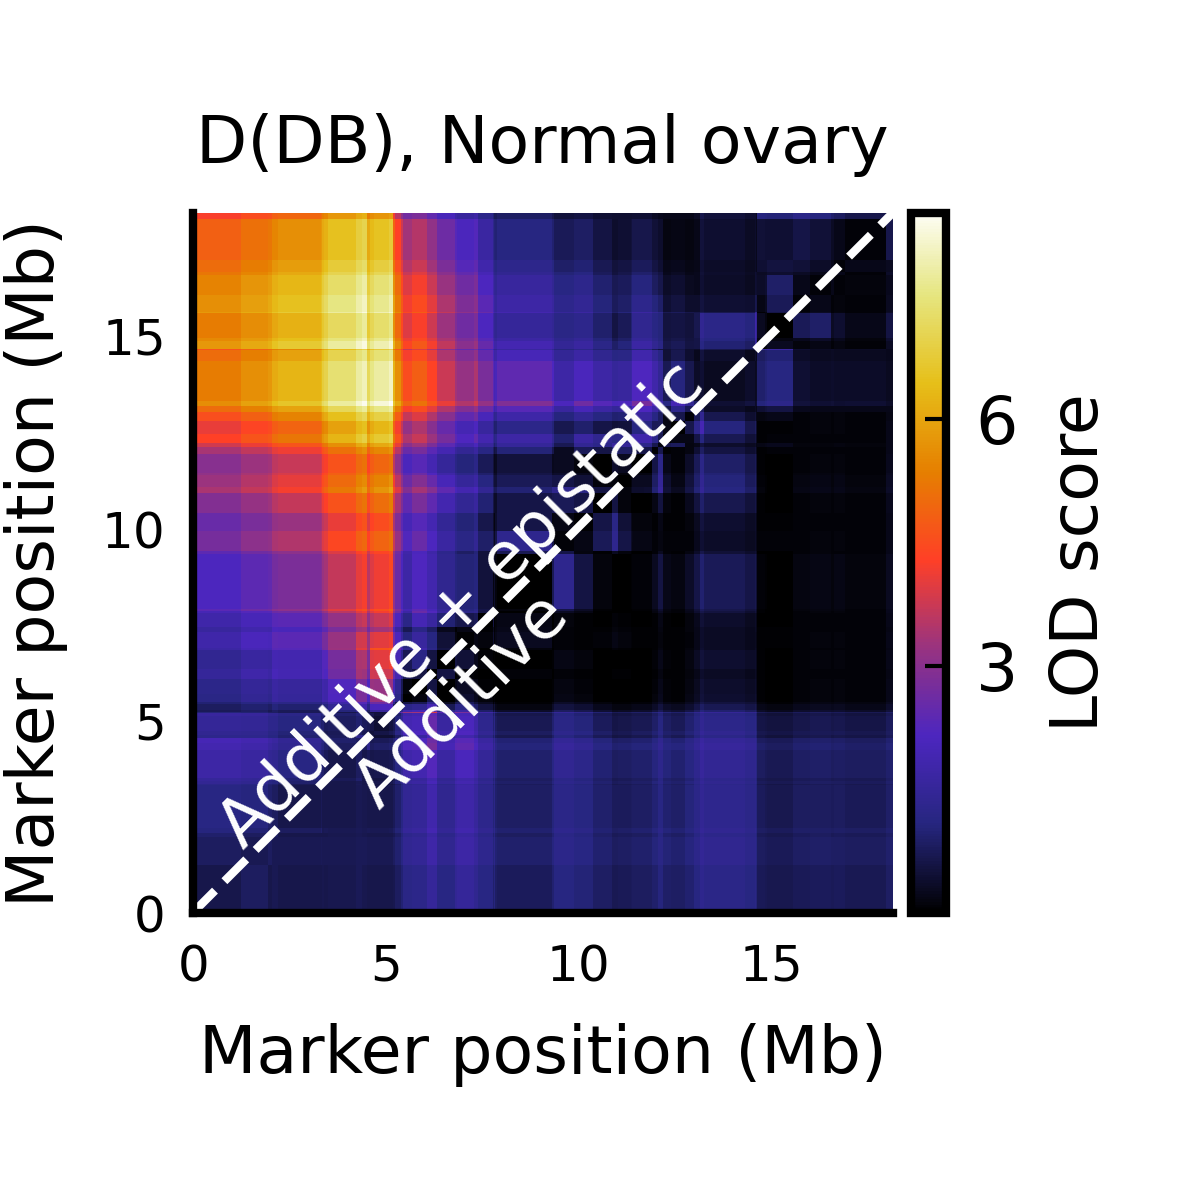

In [66]:
fig = plot(size=(200,200),dpi=600)

heatmap!(fig,
    pmap_Z,pmap_Z,LOD1,
    color=cgrad(:CMRmap,rev=false),
    aspect_ratio=1,
    label="",
    xticks=[0,5,10,15],
    xlims=(0,+Inf),
    ylims=(0,+Inf),
    yticks=[0,5,10,15],
    xlabel=string("Marker position (Mb)"),
    ylabel=string("Marker position (Mb)"),
    xguidefontsize=8,
    yguidefontsize=8,
    ytickfontsize=6,
    xtickfontsize=6,
    title=string("D(DB)",", Normal ovary"),
    colorbar_title="LOD score",
    colorbar_titlefontsize=8,
    titlefontsize=8,
    colorbar_ticks=0:3:12,   
)

plot!(fig,
    (pmap_Z)[[1,end]],(pmap_Z)[[1,end]],
    label="",
    color=:white,
    linestyle=:dash,
)

annotate!(fig,
    [(7,8,Plots.text("Additive + epistatic",8,rotation=45,:white)),
    (7,5.5,Plots.text("Additive",8,rotation=45,:white))
    ]
)

In [67]:
dir_output = "$(dir_source_data)/Fig4-Papilio+S13"

fig_name = "2d.lod_score_Normal_InclAmbiguous"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

### 3.3. Ovary phenotypes ~ Z-chromosome ancestry fraction ($f_Z$)

In [68]:
using StatsPlots

In [69]:
df = DataFrame(CSV.File("$(dir_source_data)/Fig4-Papilio+S13/DDB_ovarian_analysis.txt"))

anc_predictor = Array(df[!,6])
anc_Z = Array(df[!,4])
anc_A = Array(df[!,3])


response_p = Array(df[!,9:11]);

In [70]:
resample(response_p) = [wsample([1,2,3],response_p[i,:]) for i in 1:size(response_p)[1]]

resample (generic function with 1 method)

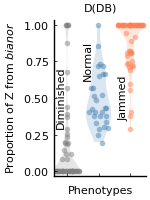

In [71]:
fig=plot(size=(150,200))
Y = resample(response_p)

idx = Y.==1
y = Y[idx]
dotplot!(fig,
    # y .+ rand(Normal(0,0.075),length(y)),
    [1],
    anc_Z[idx],
    xticks=([1,2,3],["","",""]),
    xlabel="Phenotypes",
    xguidefontsize=8,
    grid=:off,
    xlims=(-Inf,3.5),
    # ylims=(-0.05,1.3),
    title="D(DB)",
    titlefontsize=8,
    ylabel=L"\mathrm{Proportion\;of\;Z\;from\;}bianor",
    yguidefontsize=8,
    label="",color=:gray,markerstrokewidth=0,markeralpha=0.5)

violin!(fig,
    # y .+ rand(Normal(0,0.075),length(y)),
    [1],
    anc_Z[idx],
    grid=:off,
    label="",color=:gray,fillalpha=0.2,linewidth=0,)

idx = Y.==2
y = Y[idx]
dotplot!(fig,
    [2],
    # y .+ rand(Normal(0,0.075),length(y)),
    anc_Z[idx],
    label="",color=:steelblue,markerstrokewidth=0,markeralpha=0.5)

violin!(fig,
    # y .+ rand(Normal(0,0.075),length(y)),
    [2],
    anc_Z[idx],
    grid=:off,
    label="",color=:steelblue,fillalpha=0.2,linewidth=0,)

idx = Y.==3
y = Y[idx]
dotplot!(fig,
    [3],
    # y .+ rand(Normal(0,0.075),length(y)),
    anc_Z[idx],
    label="",color=:coral,markerstrokewidth=0,markeralpha=0.5)

violin!(fig,
    # y .+ rand(Normal(0,0.075),length(y)),
    [3],
    anc_Z[idx],
    grid=:off,
    label="",color=:coral,fillalpha=0.2,linewidth=0,)

annotate!(fig,[(0.8,0.5,Plots.text("Diminished",8,rotation=90)),
        (1.65,0.75,Plots.text("Normal",8,rotation=90)),
        (2.8,0.5,Plots.text("Jammed",8,rotation=90))
        ])



In [72]:
dir_output = "$(dir_source_data)/Fig4-Papilio+S13"

fig_name = "SampleScattered_by_ZAncestry"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

In [73]:
function get_μ_ste(ydata,xdata,x_l,x_r)
    
    x_mid = (x_r.+x_l)/2
    ymean = [mean(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
    yste = begin
        σ = [std(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
        n = [length(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
    end
    
    return ymean, σ ./ sqrt.(n)
    
end

get_μ_ste (generic function with 1 method)

In [74]:
wid = 0.2
x_l = -0.1:wid/10:0.9
x_r = x_l .+ wid

μ_all = zeros(length(x_l),0)
ste_all = zeros(length(x_l),0)

for i in 1:1000
    Y = resample(response_p)
    ydata = Y.==2
    xdata = anc_Z

    μ,ste = get_μ_ste(ydata,xdata,x_l,x_r)
    μ_all = hcat(μ_all,μ)
    ste_all = hcat(ste_all,ste)
    
end

μ_final = mean(μ_all;dims=2)[:]
ste_final = sqrt.(var(μ_all;dims=2) .+ (sum(ste_all.^2;dims=2))./size(ste_all)[2])[:];


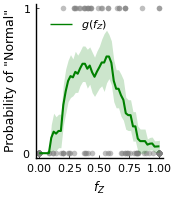

In [81]:
fig = plot(size=(175,200))

Y = resample(response_p)
ydata = Y.==2

xdata = anc_Z
ydata = Y .== 2

x_mid = (x_r.+x_l)/2
ymean = μ_final

yste = ste_final

x_mid = x_mid[.!isnan.(ymean)]
yste = yste[.!isnan.(ymean)]
ymean = ymean[.!isnan.(ymean)]

scatter!(fig,anc_Z[Y .== 2],[1],
    label="",
    markerstrokewidth=0,
    markeralpha=0.5,
    markercolor=:gray,
    ylabel="Probability of \"Normal\"",
    yticks=[0,1],
    yguidefontsize=9,
    grid=:off,
    xlabel=L"f_Z",
    xguidefontsize=9,
    )
scatter!(fig,anc_Z[Y .== 1],[0],
    label="",
    markerstrokewidth=0,
    markeralpha=0.5,
    markercolor=:gray,
    )
scatter!(fig,anc_Z[Y .== 3],[0],
    label="",
    markerstrokewidth=0,
    markeralpha=0.5,
    markercolor=:gray,
    )
plot!((x_r.+x_l)/2,ymean,
    color=:green,
    linestyle=:solid,
    linewidth=1.5,
    legend_background_color=false,
    legend=:topleft,
    label=L"g(f_Z)")

plot!((x_r.+x_l)/2,ymean.+yste,
    fillrange=ymean.-yste,
    fillcolor=:green,
    fillalpha=0.2,
    linewidth=0,label="")

In [82]:
dir_output = "$(dir_source_data)/Fig4-Papilio+S13"

fig_name = "Probability_of_Normal_on_AncZ"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

#### 3.3.1 Extract and analyze $g(f_Z)$

In [84]:
geno = DataFrame(CSV.File("$(dir_source_data)/Fig4-Papilio+S13/run.pheno_allOvaryPhenotypes/genotypes.csv"))
pheno = DataFrame(CSV.File("$(dir_source_data)/Fig4-Papilio+S13/run.pheno_allOvaryPhenotypes/phenotypes.csv"))
pmap = DataFrame(CSV.File("$(dir_source_data)/Fig4-Papilio+S13/run.pheno_allOvaryPhenotypes/map.physical.csv"));

In [85]:
idx_Z = pmap[:,2] .== 30
geno_Z = Array(geno[:,2:end])[:,idx_Z]
geno_Z = (geno_Z .== "DB").* 1
pmap_Z = pmap[:,3][idx_Z]
pheno_normal_inclAmb = pheno[:,4]
pheno_normal_exclAmb = pheno[:,5];

In [86]:
function g_DDB_ova(f;x_mid,ymean)
    
    Δ = abs.(f .- x_mid)
    s = minimum(abs.(f .- x_mid))
    
    return ymean[findfirst(x->x==s,Δ)]
   
end

# function to get ancestry for a particular marker at relative position l

anc(l,f,side) = begin
    
    if f*(1-f)==0
        
        return f
        
    else
        
        return side == 1 ? (l<=f)*1 : (l>=f)*1
        
    end
    
end

# function to get ancestry for a pair of markers at relative position l1 and l2

anc_2(l1,l2,f,side) = begin
    
    if f*(1-f)==0
        
        return [f,f]
        
    else
    
        if side == 1
            # introgress from the left end 
            [l1<=f,l2<=f] .* 1     
        else
            # introgress from the right end
            [l1>=f,l2>=f] .* 1     
        end
        
    end
end

# function to get average ancestry for the chromosome

get_anc_Z(f,side) = begin
    
    if f*(1-f) == 0
        return f
    else
        return side == 1 ? f : (1-f)
    end
    
end


get_anc_Z (generic function with 1 method)

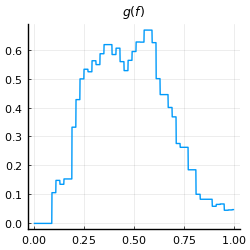

In [87]:
# inspect g(f)
x=0:0.001:1
fig = plot(size=(250,250))

plot!(fig,x,g_DDB_ova.(x;x_mid=x_mid,ymean=ymean),
    label="",
    title=L"g(f)",
    titlefontsize=9,
    )

In [88]:
# sample size
N = 142

# total numbers of independent simulations
n_repeats = 1000

L = 0.001:0.001:0.999 # relative positions

R2_1marker_additive_all = zeros(length(L),0)

@showprogress 1 for n in 1:n_repeats

    # random breakpoints
    f = begin
        X = []
        for i in 1:N
            if rand(1)[1] <= 0.5           
                x = rand([0,1])
            else
                x = rand(1)
            end
            append!(X,x)
        end
        X
    end

    # random sides

    s = ((rand(N) .<=0.5) * 1).+1

    # get phenotype

    P = g_DDB_ova.(get_anc_Z.(f,s);x_mid=x_mid,ymean=ymean);
    # P = p_2QTL.(anc_2.(0.1,0.9,f,s));

    # get chromosomal ancestry

    fZ = get_anc_Z.(f,s);
    
    R2_1marker_additive = []

    # R2_Z_ancestry = (cor(fZ,P))^2

    for l in L

        a = [anc(l,f[i],s[i]) for i in 1:N]
        append!(R2_1marker_additive,(cor(a,P))^2)

    end
    
    R2_1marker_additive_all = hcat(R2_1marker_additive_all,R2_1marker_additive)
    
    # print(var(p_modal.(fZ,0.1)))
    
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:15


In [89]:
R2_1qtl_inclAmb = []
R2_1qtl_exclAmb = []

for i in 1:size(geno_Z)[2]
    data = DataFrame(y = pheno_normal_inclAmb, x_Z = geno_Z[:,i])
    push!(R2_1qtl_inclAmb, r2(lm(@formula(y ~ x_Z),data)))
    
    data = DataFrame(y = pheno_normal_exclAmb, x_Z = geno_Z[:,i])
    push!(R2_1qtl_exclAmb, r2(lm(@formula(y ~ x_Z),data)))
end

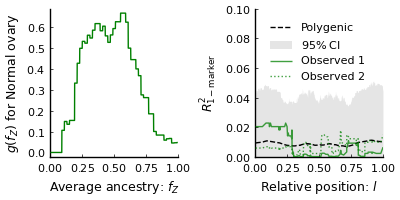

In [90]:
fig = plot(size=(400,200),layout=(1,2))

upper_quantile = [quantile(R2_1marker_additive_all[i,:],0.975) for i in 1:length(L)]
lower_quantile = [quantile(R2_1marker_additive_all[i,:],0.025) for i in 1:length(L)]

plot!(fig,L,mean(R2_1marker_additive_all;dims=2),
    label="Polygenic",
    xlabel=string("Relative position: ",L"l"),
    xlabelfontsize=9,
    linecolor=:black,
    linestyle=:dash,
    alpha=1,
    # yticks=0:0.2:1.25,
    # title="",
    # titlefontsize=10,
    ylabel=L"R^2_{\mathrm{1-marker}}",
    ylabelfontsize=9,
    ylims=(0,0.1),
    xticks=[0,0.25,0.5,0.75,1],
    xlims=(0,1),
    subplot=2,
    linewidth=1,
    )

plot!(fig,L,upper_quantile,
    fill_between = lower_quantile,
    fillcolor=:black,
    fillalpha=0.1,
    label=L"95\%\;\mathrm{CI}",
    linewidth=0,
    # yticks=0:0.2:1.25,
    # ylims=(0,1.25),
    subplot=2,
    )

plot!(fig,L,g_DDB_ova.(L;x_mid=x_mid,ymean=ymean),
    label="",
    xlims=(0,1),
    xticks=[0,0.25,0.5,0.75,1],
    # ylims=(0,1),
    ylabel=string(L"g(f_Z)"," for Normal ovary"),
    xlabel=string("Average ancestry: ",L"f_Z"),
    xlabelfontsize=9,
    ylabelfontsize=9,
    subplot=1,
    linecolor=:green,
    grid=:off,
    )

plot!(fig,pmap_Z./pmap_Z[end],R2_1qtl_inclAmb,
    label="Observed 1",
    color=:green,
    grid=:off,
    alpha=0.75,
    legend_background_color=false,
    legend=:topleft,
    subplot=2
)

plot!(fig,pmap_Z./pmap_Z[end],R2_1qtl_exclAmb,
    label="Observed 2",
    color=:green,
    grid=:off,
    legend_background_color=false,
    legend=:topleft,
    alpha=0.75,
    subplot=2,
    linestyle=:dot,
)

fig

In [91]:
dir_output = "$(dir_source_data)/Fig4-Papilio+S13"

fig_name = "DDB_Normal_gfZ_prediction_obs1_inclAmb_obs2_exclAmb"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

In [92]:
# sample size
N = 142

# total numbers of independent simulations
n_repeats = 100

dl = 0.01
L = 0.01:dl:0.99
# R2_2qtl_additive = zeros(size(L)[1],size(L)[1])

R2_2qtl_v0_all = zeros(size(L)[1],size(L)[1],0)
R2_2qtl_v1_all = zeros(size(L)[1],size(L)[1],0)

@showprogress 1 for n in 1:n_repeats

    # random breakpoints
    f = begin
        X = []
        for i in 1:N
            if rand(1)[1] <= 0.5           
                x = rand([0,1])
            else
                x = rand(1)
            end
            append!(X,x)
        end
        X
    end

    # random sides

    s = ((rand(N) .<=0.5) * 1).+1

    # get phenotype

    P = g_DDB_ova.(get_anc_Z.(f,s);x_mid=x_mid,ymean=ymean);
    # P = p_2QTL.(anc_2.(0.1,0.9,f,s));

    R2_2qtl_v0 = zeros(size(L)[1],size(L)[1]).*NaN
    R2_2qtl_v1 = zeros(size(L)[1],size(L)[1]).*NaN
    
    i = 1
    for l1 in L
        j = 1
        for l2 in L[1]:dl:l1
            a = [anc_2(l1,l2,f[i],s[i]) for i in 1:N]
            a = vcat((transpose(a))...)

            data = DataFrame(y = P, x1 = 2 .* a[:,1] .- 1, x2=2 .* a[:,2] .- 1)
            ols_sq = lm(@formula(y ~ 1 + x1 + x2 + x1 & x2), data);
            R2_2qtl_v0[i,j] = r2(ols_sq)     
            # α12_2qtl_v0[i,j] = coef(ols_sq)[2]


            data = DataFrame(y = P, x1 = 2 .* a[:,1] .- 1, x2=2 .* a[:,2] .- 1)
            ols_sq = lm(@formula(y ~ 1 + x1 + x2), data);
            R2_2qtl_v1[i,j] = r2(ols_sq)     
            # α12_2qtl_v1[i,j] = coef(ols_sq)[4]

            j = j+1
        end
        i = i+1
    end
    
    R2_2qtl_v0_all = cat(R2_2qtl_v0_all,R2_2qtl_v0;dims=3)
    R2_2qtl_v1_all = cat(R2_2qtl_v1_all,R2_2qtl_v1;dims=3)
    
    # print(var(p_modal.(fZ,0.1)))
    
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:58


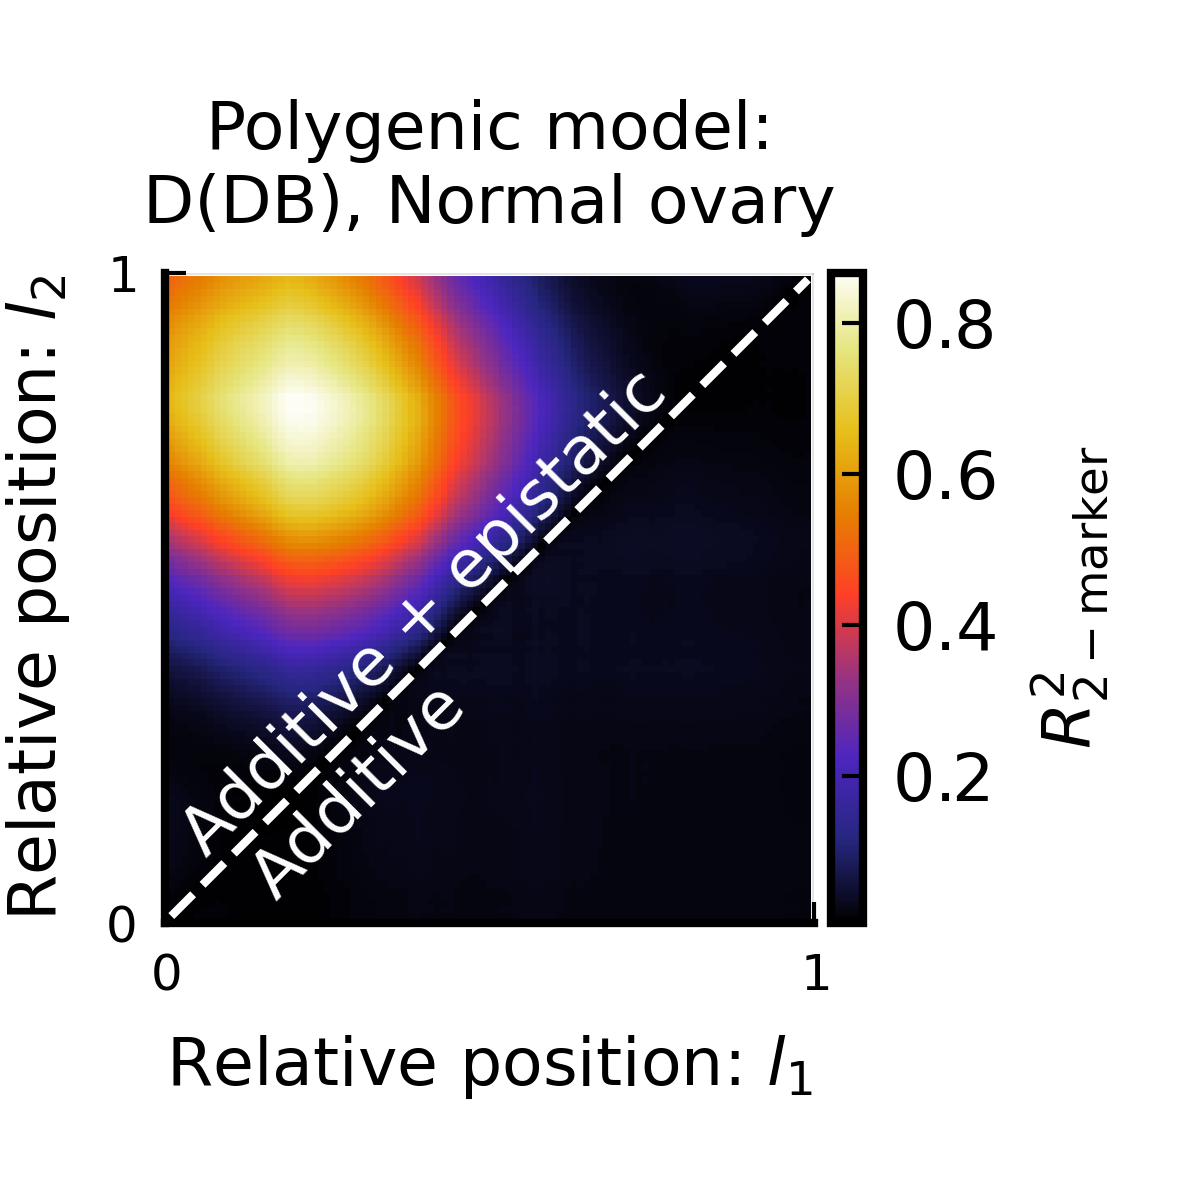

In [93]:
R2_v0_mean = dropdims(mean(R2_2qtl_v0_all;dims=3);dims=3)
R2_v1_mean = dropdims(mean(R2_2qtl_v1_all;dims=3);dims=3)

fig = plot(size=(200,200),dpi=600)

heatmap!(fig,
    L,L,R2_v0_mean,
    color=cgrad(:CMRmap,rev=false),
    aspect_ratio=1,
    label="",
    xticks=[0,1],
    xlims=(0,+Inf),
    ylims=(0,+Inf),
    yticks=[0,1],
    xlabel=string("Relative position: ",L"l_1"),
    ylabel=string("Relative position: ",L"l_2"),
    xguidefontsize=8,
    yguidefontsize=8,
    ytickfontsize=6,
    xtickfontsize=6,
    title=string("Polygenic model:\n","D(DB)",", Normal ovary"),
    colorbar_title=L"R^2_{2-\mathrm{marker}}",
    colorbar_titlefontsize=8,
    titlefontsize=8,
    colorbar_ticks=0:0.2:1,   
)

heatmap!(fig,
    L,L,transpose(R2_v1_mean),
    color=cgrad(:CMRmap,rev=false),
    aspect_ratio=1,
    label="",
    xticks=[0,1],
    xlims=(0,1),
    ylims=(0,1),
    yticks=[0,1],
    xlabel=string("Relative position: ",L"l_1"),
    ylabel=string("Relative position: ",L"l_2"),
    xguidefontsize=8,
    yguidefontsize=8,
    ytickfontsize=6,
    xtickfontsize=6,
    title=string("Polygenic model:\n","D(DB)",", Normal ovary"),
    colorbar_title=L"R^2_{2-\mathrm{marker}}",
    colorbar_titlefontsize=8,
    titlefontsize=8,
    colorbar_ticks=0:0.2:1,   
)

plot!(fig,
    L,L,
    label="",
    color=:white,
    linestyle=:dash,
)

annotate!(fig,
    [(0.4,0.475,Plots.text("Additive + epistatic",8,rotation=45,:white)),
    (0.3,0.2,Plots.text("Additive",8,rotation=45,:white))
    ]
)

In [94]:
dir_output = "$(dir_source_data)/Fig4-Papilio+S13"

fig_name = "DDB_Normal_gfZ_2marker_prediction"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

## 4. QTL analysis - Part 3

**Software:** None. All results are based on scripts below on variation in pupal weight and Z-chromosome ancestry

In [5]:
using Statistics,GLM
using StatsPlots

In [6]:
function get_ancestry_chr_interval(chr,g_all,l_all,interval)
    g = g_all["$(chr)"]
    l = l_all["$(chr)"]
    idx = (l .>= interval[1]) .& (l .< interval[2])
    δl = vcat(l[idx],interval[2:2]) .- vcat(interval[1:1],l[idx])
    if idx[1] > 1
        return g[:,vcat([idx[1]-1],idx)] * δl ./sum(δl) 
    else
        δl = δl[2:end]
        return g[:,idx] * δl ./sum(δl)  
    end
end

get_ancestry_chr_interval (generic function with 1 method)

In [30]:
## these pure species data are alst provided from the code blocks way down!

# dir_source = "/n/home00/txiong/Research/2022_HybridSterility/Phenotypes"

# dfB = DataFrame(CSV.File("$(dir_source)/pupal_weight_B.txt",header=false))
# dfD = DataFrame(CSV.File("$(dir_source)/pupal_weight_D.txt",header=false))

# w_fB = dfB[!,2][dfB[!,1] .== "F"]
# w_fD = dfD[!,2][dfD[!,1] .== "F"]
# w_fB = w_fB[.!ismissing.(w_fB)]
# w_fD = w_fD[.!ismissing.(w_fD)];

┌ Warning: thread = 1 warning: parsed expected 2 columns, but didn't reach end of line around data row: 13. Parsing extra columns and widening final columnset
└ @ CSV /n/home00/txiong/.julia/packages/CSV/0Elut/src/file.jl:578


### 4.1. Pupal weight in D(DB) females

In [24]:
## get raw data

dir_sub = "Fig3+S8toS10/Fig3A_3B_3C_3D_3E/run.pheno_pupalWeight_DDB"

chr_size = readdlm("$(dir_source_data)/Fig3+S8toS10/chr_size.txt")
chr_size = chr_size[:,1] ./1E6

geno = DataFrame(CSV.File("$(dir_source_data)/$(dir_sub)/genotypes.csv"))[!,2:end]
pmap = DataFrame(CSV.File("$(dir_source_data)/$(dir_sub)/map.physical.csv"))
gmap = DataFrame(CSV.File("$(dir_source_data)/$(dir_sub)/map.genetic.csv"))
covar = DataFrame(CSV.File("$(dir_source_data)/$(dir_sub)/covariates.csv"))
pheno = DataFrame(CSV.File("$(dir_source_data)/$(dir_sub)/phenotypes.csv"));

g = Array(geno .== "DB") .* 1/2 .+ Array(geno .== "DD") .* 0
co = covar[:,2]
p = pheno[!,:Pupal_Weight];

In [25]:
g_all = Dict()
l_all = Dict()
for chr in 1:30
    g_all["$(chr)"] = g[:,pmap[:,2] .== chr]
    l_all["$(chr)"] = pmap[:,3][pmap[:,2] .== chr]
end

In [26]:
function get_ancestry_chrs(chr_list,g_all,l_all,chr_size)
    chr = chr_list[1]
    cumulative_anc = zeros(size(g_all["$(chr)"])[1])
    L = 0
    for chr in chr_list
        δl = vcat(l_all["$(chr)"][2:end],[chr_size[chr]]) .- l_all["$(chr)"]
        cumulative_anc = cumulative_anc .+ g_all["$(chr)"] * (δl)
        L = L + sum(δl)
    end
    return cumulative_anc ./ L
end

get_ancestry_chrs (generic function with 1 method)

In [27]:
anc_A = get_ancestry_chrs(1:29,g_all,l_all,chr_size)
anc_Z = get_ancestry_chrs([30],g_all,l_all,chr_size) .* 2;

#### 4.1.1. Preprocessing and visualization

In [28]:
# controlling for seasonal variation

data = DataFrame(y = p, x_co = co, x_Z = anc_Z)
ols = lm(@formula(y ~ x_co + x_Z), data)

println(ols)

# adjusting observation by removing the effect of brood

## choose one of the following for analyzing either DDB or BBD
p_adjusted = p .- coef(ols)[2] .* (co .== "II"); # for DDB
# p_adjusted = p .+ coef(ols)[2] .* (co .== "I"); # for BBD

## regress again

data = DataFrame(y = p_adjusted, x_Z = anc_Z)
ols = lm(@formula(y ~ x_Z), data)

println(ols)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x_co + x_Z

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)  Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   1.83945     0.0455048   40.42    <1e-75   1.74944    1.92947
x_co: II     -0.0627604   0.0437726   -1.43    0.1540  -0.149347   0.0238262
x_Z          -1.00302     0.0544152  -18.43    <1e-37  -1.11066   -0.895378
────────────────────────────────────────────────────────────────────────────
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x_Z

Coefficients:
───────────────────────────────────────────────

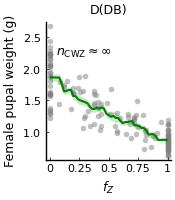

In [29]:
## plot deviation from the pure maternal species weight

xdata = anc_Z
ydata = p_adjusted

wid = 0.2
x_l = -0.1:wid/10:0.9
x_r = x_l .+ wid

x_mid = (x_r.+x_l)/2
ymean = [mean(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
yste = begin
    
    σ = [std(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
    n = [length(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
    σ ./ sqrt.(n)
end

x_mid = x_mid[.!isnan.(ymean)]
yste = yste[.!isnan.(ymean)]
ymean = ymean[.!isnan.(ymean)]


fig = plot(size=(175,200))


scatter!(fig,anc_Z ,p_adjusted,
    markerstrokewidth=0,
    markercolor=:gray,
    markeralpha=0.5,
    label="",
    title="D(DB)",
    titlefontsize=9,
    xguidefontsize=9,
    yguidefontsize=9,
    grid=:off,
    xticks=([0,0.25,0.5,0.75,1],["0","0.25","0.5","0.75","1"]),
    ylabel=string("Female pupal weight"," (g)"),
    xlabel=L"f_Z",
)


plot!((x_r.+x_l)/2,ymean,
    color=:green,
    linestyle=:solid,
    linewidth=1.5,
    label="")

plot!((x_r.+x_l)/2,ymean.+yste,
    fillrange=ymean.-yste,
    fillcolor=:green,
    fillalpha=0.2,
    linewidth=0,label="")

annotate!(fig,[(0.05,2.25,Plots.text(L"n_{\mathrm{CWZ}}\approx\infty",9,:left))])

# hline!(fig,[mean(p_maternal)],linecolor=:black,linestyle=:dash,label="")

In [108]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "DDB.WeightAbnormality_ancZ_relation"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

##### 4.1.1.1. Effective number of QTL

In [109]:
idx_Z_1 = anc_Z .>= 1
idx_Z_0 = anc_Z .<= 0;

In [110]:
ΔZ = mean(p_adjusted[idx_Z_1]) - mean(p_adjusted[idx_Z_0])

σ2_mean1 = var(p_adjusted[idx_Z_1])/length(p_adjusted[idx_Z_1])
σ2_mean0 = var(p_adjusted[idx_Z_0])/length(p_adjusted[idx_Z_0])

var_S = var(p_adjusted) - mean([var(p_adjusted[idx_Z_1]),var(p_adjusted[idx_Z_0])])
# var_S = var(p_adjusted) - var(p_adjusted[idx_Z_0])
# var_S = var(p_adjusted) - var(ydata_new) # ydata_new is the detrended dataset

c_bar = 1/6 # average pairwise recombination rate

nCW = (ΔZ^2 - σ2_mean1 - σ2_mean0) / (4*var_S)
nCWZ = 2 * c_bar * nCW / (1-nCW*(1-2*c_bar))

-2.7204732730687238

In [111]:
println("Genetic variance in the unit of [gram]^2:")
println("Expected Vg for a single QTL: ",string(0.25*(ΔZ^2 - σ2_mean1 - σ2_mean0)))
println("Expected Vg for a linear polygenic model: ",string(1/6*(ΔZ^2 - σ2_mean1 - σ2_mean0)))
println("Observed Vg : ",string(var_S))

Genetic variance in the unit of [gram]^2:
Expected Vg for a single QTL: 0.24973637464652979
Expected Vg for a linear polygenic model: 0.16649091643101985
Observed Vg : 0.13589129281420406


##### 4.1.1.2. BayesQTLBIC

In [30]:
marker_range = vcat(1:12:size(g_all["30"])[2],[size(g_all["30"])[2]])
marker_range = unique(marker_range)
print(length(marker_range))

Z_geno = Int.(g_all["30"][:,marker_range].*2)
pheno = p_adjusted

@rput Z_geno
@rput pheno

R"Z_geno";

15

In [31]:
R"""

library("BayesQTLBIC")
library("leaps")

bic_result <- bicreg.qtl(x=Z_geno,y=pheno,OR=1000000000,maxCol=41,
            nbest=500,nvmax=6,prior=0.5,keep.size=1)

"""

@rget bic_result

bic_result_DDB = bic_result;

# Data stored in the above variable will be combined
# with "bic_result_BBD" in 4.2 to plot the BIC results together

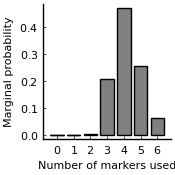

In [114]:
fig = plot(size=(175,175))

bar!(fig,(1:length(bic_result[:postprob_size])) .- 1,bic_result[:postprob_size],
    # ylims=(0,0.5),
    label="",
    xlabel="Number of markers used",
    ylabel="Marginal probability",
    fillcolor=:gray,
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    xticks=0:10)

In [115]:
# no need to save the above figure

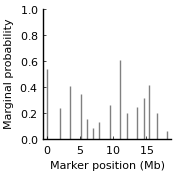

In [116]:
marker_idx = marker_range[parse.(Int64,hcat(split.(bic_result[:namesx],"X")...)[2,:])]
marker_pos = pmap[:,3][end-163:end][marker_idx]

fig = plot(size=(175,175))

plot!(fig,marker_pos,bic_result[:probne0]/100,
    ylims=(0,1),
    # xlims=(0,+Inf),
    label="",
    xlabel="Marker position (Mb)",
    ylabel="Marginal probability",
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    color=:gray,
    xticks=[0,5,10,15],
    seriestype=:stem)

In [117]:
# no need to save the above figure

#### 4.1.2. Regression-based power analysis

##### 4.1.2.1. Computing $R^2_{\text{Z-ancestry}}$

In [118]:
data = DataFrame(y = p, x_co = co, x_Z = anc_Z)
ols = lm(@formula(y ~ x_co + x_Z), data)
R2_Z_anc = r2(ols)

## the following is for DDB
ols

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x_co + x_Z

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error       t  Pr(>|t|)  Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   1.83945     0.0455048   40.42    <1e-75   1.74944    1.92947
x_co: II     -0.0627604   0.0437726   -1.43    0.1540  -0.149347   0.0238262
x_Z          -1.00302     0.0544152  -18.43    <1e-37  -1.11066   -0.895378
────────────────────────────────────────────────────────────────────────────

In [119]:
## adjusting observation by removing the effect of brood

p_adjusted = p .- coef(ols)[2] .* (co .== "II");

## doing linear regression on adjusted p without considering covariates

data = DataFrame(y = p_adjusted, x_Z = anc_Z)
ols = lm(@formula(y ~ x_Z), data)
R2_Z_anc = r2(ols)

0.7247579087214295

##### 4.1.2.2. Defining theoretical curves of $R^2_{\text{n-markers}}/R^2_{\text{Z-ancestry}}$ where n = 1,2,3

In [120]:
R2_1qtl = []
for i in 1:size(g_all["30"])[2]
    data = DataFrame(y = p_adjusted, x_Z = g_all["30"][:,i].*2)
    push!(R2_1qtl, r2(lm(@formula(y ~ x_Z),data)))
end

R2_2qtl = zeros(size(g_all["30"])[2],size(g_all["30"])[2]) .+ NaN

for i in 1:size(g_all["30"])[2]
    for j in (i+1):size(g_all["30"])[2]
        data = DataFrame(y = p_adjusted, x_Z1 = g_all["30"][:,i].*2, x_Z2 = g_all["30"][:,j].*2)
        R2_2qtl[i,j] = r2(lm(@formula(y ~ x_Z1 + x_Z2),data))
    end
end

theory_curve_1(l)=3/8*(1-2*(l-1)*l)^2
theory_curve_2(l1,l2)=3/4*(2*abs(l1 - l2)*(l1 + l2 - 1)^2 + (1 + 2*l1*(1 - l1))*(1+ 
        2*l2*(1-l2)))/(2-abs(l1 - l2))


theory_curve_3(l1,l2,l3)=(3*((1+2*(1-l3)*l3)^2*abs(l1 - l2)^2 + 
     abs(l1-l3)*(8*(l1 - l2)*(-1+l1+l2)*(l2-l3)*(-1+l2+ 
           l3)+(1+2*(1-l2)*l2)^2*abs(l1 - l3)) - 
     2*(4*(l1 - l2)*(-1+l1+l2)*(l1-l3)*(-1+l1+l3)+(1+ 
           2*(1-l1)*l1)*(1+2(1-l2)*l2)*abs(l1 - l3))*abs(l2 - l3)+
        (1+2*(1-l1)*l1)^2*abs(l2-l3)^2- 
     2*abs(l1-l2)*(4*(l1-l3)*(l2-l3)*(-1+l1+l3)*(-1+l2+ 
           l3)+(1+2*(1-l2)*l2)*(1+2*(1-l3)*l3)*abs(l1 - l3)+
            (1+2*(1-l1)*l1)*(1+2*(1-l3)*l3)*abs(l2 - l3))))/(8*(abs(l1-l2)^2+
        (abs(l1-l3)-abs(l2-l3))^2+2*abs(l1 - l2)*(abs(l1 - l3)*(-1+abs(l2-l3))-abs(l2-l3))))

theory_curve_3 (generic function with 1 method)

##### 4.1.2.3. Comparing $R^2_{\text{1-marker}}/R^2_{\text{Z-ancestry}}$ with observed data under the polygenic model

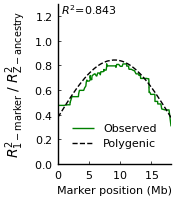

In [121]:
x = pmap[:,3][end-163:end]
y_predicted = theory_curve_1.(x./x[end])
y_observed = R2_1qtl ./ R2_Z_anc

R2_y = round(1-sum((y_predicted.-y_observed).^2)/sum((y_observed .- mean(y_observed)).^2),digits=3)

fig = plot(size=(175,200))
plot!(fig,x,y_observed,color=:green,
    ylims=(0,1.3),xlims=(0,+Inf),
    xlabel="Marker position (Mb)",
    ylabel=L"R^2_{\mathrm{1-marker}}\;/\;R^2_{\mathrm{Z-ancestry}}",
    yguidefontsize=10,
    xguidefontsize=8,
    legend=:bottom,
    legend_background_color=false,
    label="Observed",
    grid=:off,
    # title="D(DB)",
    titlefontsize=8,
    )
plot!(fig,x,y_predicted,color=:black,
    label="Polygenic",
    linestyle=:dash,
    )
annotate!(fig,[(5,1.25,Plots.text(string(L"R^2","=$(R2_y)"),8))])

In [122]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "DDB.polygenic_model.1marker.fit"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

##### 4.1.2.4. to 4.1.2.5. are omitted as results are not included in the paper

##### 4.1.2.6. Comparing $R^2_{\text{1-marker}}/R^2_{\text{Z-ancestry}}$ with observed data under the 1-QTL model

In [125]:
x = pmap[:,3][end-163:end]

# searching for the best QTL position by minimizing the sum of squared errors

y_observed = R2_1qtl ./ R2_Z_anc
squared_error = []
QTL_pos = 0:0.01:1
for qtl_pos in QTL_pos
    
    R2_fZ_theory = 3/8*(1+2*qtl_pos*(1-qtl_pos))^2
    theory_curve_1marker_1QTL(l)=(1-abs(l-qtl_pos))^2 / R2_fZ_theory   
    y_predicted = theory_curve_1marker_1QTL.(x./x[end])    
    append!(squared_error,sum((y_observed .- y_predicted).^2))  
end

best_QTL_pos = QTL_pos[findfirst(x->x==minimum(squared_error),squared_error)]
print("Best 1 QTL position: ", best_QTL_pos)
R2_fZ_theory = 3/8*(1+2*best_QTL_pos*(1-best_QTL_pos))^2
theory_curve_1marker_1QTL(l)=(1-abs(l-best_QTL_pos))^2 / R2_fZ_theory   

Best 1 QTL position: 0.52

theory_curve_1marker_1QTL (generic function with 1 method)

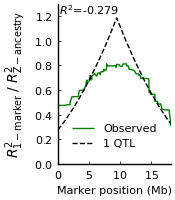

In [126]:
x = pmap[:,3][end-163:end]
y_predicted = theory_curve_1marker_1QTL.(x./x[end])
y_observed = R2_1qtl ./ R2_Z_anc

R2_y = round(1-sum((y_predicted.-y_observed).^2)/sum((y_observed .- mean(y_observed)).^2),digits=3)

fig = plot(size=(175,200))
plot!(fig,x,y_observed,color=:green,
    ylims=(0,1.3),xlims=(0,+Inf),
    xlabel="Marker position (Mb)",
    ylabel=L"R^2_{\mathrm{1-marker}}\;/\;R^2_{\mathrm{Z-ancestry}}",
    yguidefontsize=10,
    xguidefontsize=8,
    legend=:bottom,
    legend_background_color=false,
    label="Observed",
    grid=:off,
    # title="D(DB)",
    titlefontsize=8,
    )

plot!(fig,x,y_predicted,color=:black,
    label="1 QTL",
    linestyle=:dash,
    )

annotate!(fig,[(5,1.25,Plots.text(string(L"R^2","=$(R2_y)"),8))])

In [127]:
# no need to save the above figure

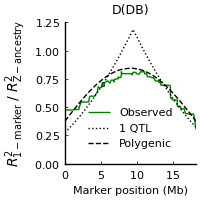

In [133]:
x = pmap[:,3][end-163:end]
y_predicted = theory_curve_1marker_1QTL.(x./x[end])
y_observed = R2_1qtl ./ R2_Z_anc

R2_y = round(1-sum((y_predicted.-y_observed).^2)/sum((y_observed .- mean(y_observed)).^2),digits=3)

fig = plot(size=(200,200))
plot!(fig,x,y_observed,color=:green,
    ylims=(0,1.25),xlims=(0,+Inf),
    xlabel="Marker position (Mb)",
    ylabel=L"R^2_{\mathrm{1-marker}}\;/\;R^2_{\mathrm{Z-ancestry}}",
    yguidefontsize=10,
    xguidefontsize=8,
    legend=:bottom,
    legend_background_color=false,
    label="Observed",
    grid=:off,
    title="D(DB)",
    titlefontsize=9,
    )

plot!(fig,x,y_predicted,color=:black,
    label="1 QTL",
    linestyle=:dot,
    )

# annotate!(fig,[(1,1.4,Plots.text(string(L"R^2_{\mathrm{1QTL}}","=$(R2_y)"),8,:left))])

# overlaying the polygenic model

y_predicted = theory_curve_1.(x./x[end])
R2_y = round(1-sum((y_predicted.-y_observed).^2)/sum((y_observed .- mean(y_observed)).^2),digits=3)

plot!(fig,x,y_predicted,color=:black,
    label="Polygenic",
    linestyle=:dash,
    )

# annotate!(fig,[(1,1.25,Plots.text(string(L"R^2_{\mathrm{polygenic}}","=$(R2_y)"),8,:left))])

In [134]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "DDB.1QTL_polygenic_models.1marker.fit"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

##### 4.1.2.7. Comparing $R^2_{\text{2-markers}}/R^2_{\text{Z-ancestry}}$ with observed data under the 2-QTL model

In [135]:
ρ(l1,l2)=1-abs(l1-l2)

ρ_x1_to_x2andx3(l1,l2,l3,b) = begin
    
    # correlation coefficient between
    # anc(l1)
    # and
    # linear combination: anc(l2) + b * anc(l3)
    
    (ρ(l1,l2) + b*ρ(l1,l3))/sqrt(1+b^2+2*b*ρ(l2,l3))
     
end

R2_y1_plus_b_times_y2(l1,l2,ly1,ly2,b) = begin
    
    # R^2 values of regression with
    # target variable: anc(ly1) + b*anc(ly2)
    # two additive variable: anc(l1) and anc(l2)
    
    X = [ρ_x1_to_x2andx3(l1,ly1,ly2,b),ρ_x1_to_x2andx3(l2,ly1,ly2,b)]
    
    A = [1 ρ(l1,l2);
         ρ(l1,l2) 1]
    
    transpose(X)*inv(A)*X
    
end

R2_fZ(ly1,ly2,b) = begin
    
    3/8 * (1+2*ly1*(1-ly1)+b*(1+2*ly2*(1-ly2)))^2 / (1+b^2+2*b*ρ(ly1,ly2))
    
end

R2_fZ (generic function with 1 method)

In [136]:
x = pmap[:,3][end-163:end]

R2_2markers_observed = []

for i in 1:size(g_all["30"])[2]
    for j in (i+1):size(g_all["30"])[2]
        append!(R2_2markers_observed,R2_2qtl[i,j])
    end
end

# optimizing ly1,ly2,b

ly1_range = 0:0.01:1
ly2_range = 0:0.01:1
b_range = 1:1

ly1_best = 0
ly2_best = 0
b_best = 0

squared_error = +Inf

@showprogress 1 for ly1 in ly1_range
    for ly2 in ly2_range
        for b in b_range
            
            R2_predicted_2markers = [] 
            
            R2_fZ_predicted = R2_fZ(ly1,ly2,b)
            
            for i in 1:size(g_all["30"])[2]
                for j in (i+1):size(g_all["30"])[2]
                    append!(R2_predicted_2markers, 
                        R2_y1_plus_b_times_y2(x[i]./x[end],x[j]./x[end],ly1,ly2,b))
                end
            end
            
            squared_error_new = sum((R2_predicted_2markers./R2_fZ_predicted .- R2_2markers_observed./R2_Z_anc).^2)
            
            if squared_error_new < squared_error
                
                squared_error = squared_error_new
                
                ly1_best = ly1
                ly2_best = ly2
                b_best = b
                
                # print([ly1_best,ly2_best,b_best,squared_error])
                # print("\n")
            end
                        
        end
    end
end


Progress: 100%|█████████████████████████████████████████| Time: 0:07:50


In [137]:
println("The first best QTL position: ",ly1_best)
println("The second best QTL position: ",ly2_best)
# println("Total squared error: ",squared_error)

The first best QTL position: 0.21
The second best QTL position: 0.74
Effect size of second QTL relative to the first: 1


In [138]:
ly1_best = 0.21
ly2_best = 0.74
b_best = 1


x = pmap[:,3][end-163:end]

y_predicted_2qtl = zeros(size(g_all["30"])[2],size(g_all["30"])[2]) .+ NaN


R2_fZ_predicted = R2_fZ(ly1_best,ly2_best,b_best)
for i in 1:size(g_all["30"])[2]
    for j in (i+1):size(g_all["30"])[2]
        y_predicted_2qtl[j,i] = R2_y1_plus_b_times_y2(x[i]./x[end],x[j]./x[end],ly1_best,ly2_best,b_best)/R2_fZ_predicted
    end
end

y_observed_reshaped = reshape(R2_2qtl ./ R2_Z_anc,length(R2_2qtl))
y_predicted_2qtl_reshaped = reshape(transpose(y_predicted_2qtl),length(transpose(y_predicted_2qtl)))

y_observed_reshaped = y_observed_reshaped[.!isnan.(y_observed_reshaped)]
y_predicted_2qtl_reshaped = y_predicted_2qtl_reshaped[.!isnan.(y_predicted_2qtl_reshaped)]

R2_y = round(1-sum((y_predicted_2qtl_reshaped .- y_observed_reshaped).^2)/sum((y_observed_reshaped .- mean(y_observed_reshaped)).^2),digits=3)


0.793

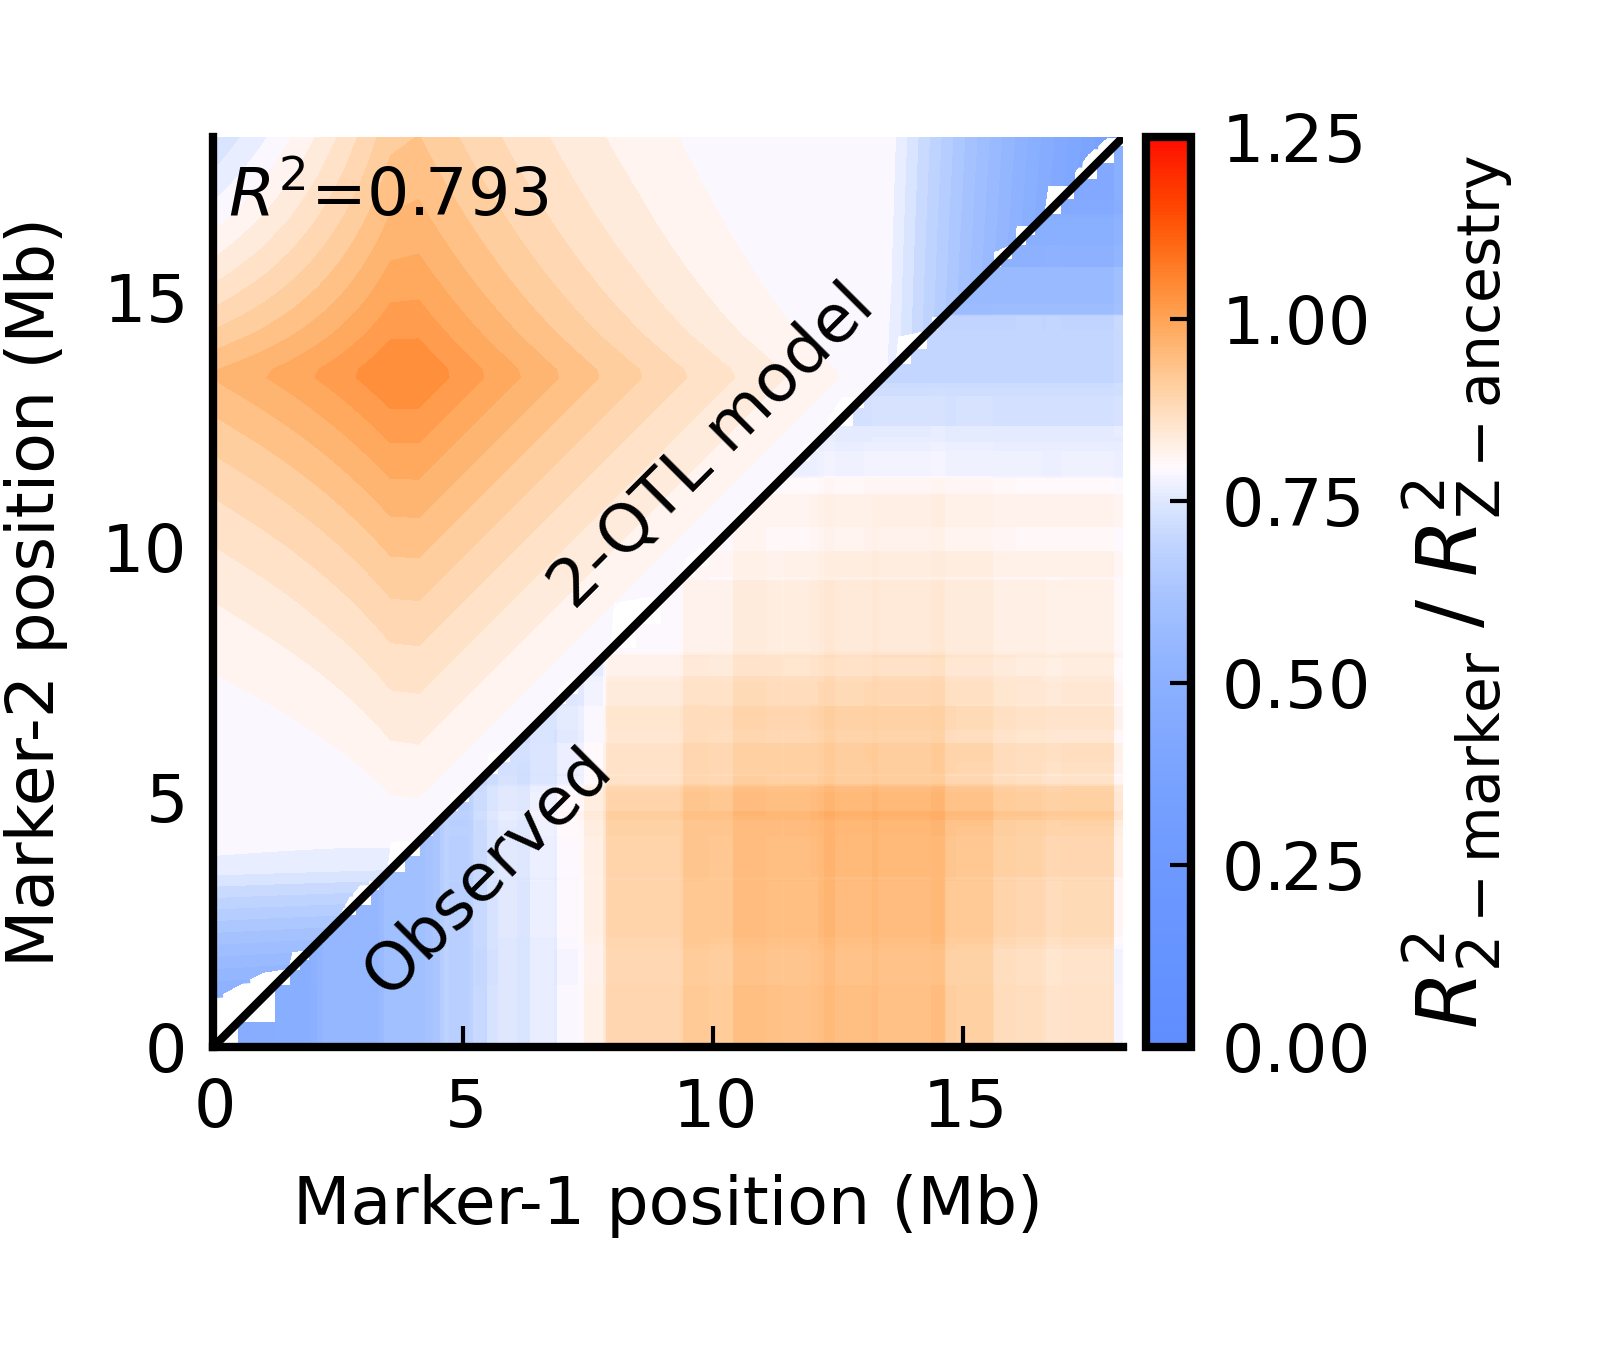

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [139]:
fig = plot(size=(270,225))

# c = cgrad(:island,rev=true)
# c = cgrad(:tab20c)

c = cgrad(:blackbody,rev=true)

heatmap!(fig,x,x,R2_2qtl ./ R2_Z_anc,color=c,
    clims=(0,1.25),
    xlims=(0,+Inf),
    ylims=(0,+Inf),
    xlabel="Marker-1 position (Mb)",
    ylabel="Marker-2 position (Mb)",
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    # title="Cross direction: D(DB)",
    colorbar_title=L"R^2_{\mathrm{2-marker}}\;/\;R^2_{\mathrm{Z-ancestry}}",
    colorbar_titlefontsize=10,
    titlefontsize=8,
    dpi=600,
    aspect_ratio=1)
contour!(fig,x,x,y_predicted_2qtl,color=c,format=:png,
    levels=30,
    fill=true)
plot!(fig,[0,x[end]],[0,x[end]],label="",linestyle=:solid,linecolor=:black,)

annotate!(fig,[(5.5,3.5,Plots.text("Observed",8,rotation=45))])
annotate!(fig,[(10,12,Plots.text("2-QTL model",8,rotation=45))])

annotate!(fig,[(3.5,17,Plots.text(string(L"R^2","=$(R2_y)"),8))])

In [140]:
# no need to save the above figure

##### 4.1.2.8. Comparing $R^2_{\text{1-marker}}/R^2_{\text{Z-ancestry}}$ with observed data under the 2-QTL model

Positions of the two markers correspond to the previous section 4.1.2.7.

In [142]:
theory_curve_2QTL_1marker(l,l1,l2)=begin
    
    # l: marker position
    # l1,l2: QTL positions
    # QTLs are additive with equal phenotypic effects
    
    R2_num = (2-abs(l-l1)-abs(l-l2))^2/(2+2*(1-abs(l1-l2)))
    R2_denom = 3/8 * (2+2*l1*(1-l1)+2*l2*(1-l2))^2/(2+2*(1-abs(l1-l2)))
    
    R2_num/R2_denom
    
end

theory_curve_2QTL_1marker (generic function with 1 method)

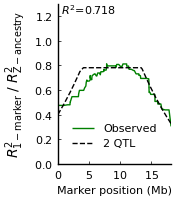

In [143]:
x = pmap[:,3][end-163:end]
y_predicted = theory_curve_2QTL_1marker.(x./x[end],ly1_best,ly2_best)
y_observed = R2_1qtl ./ R2_Z_anc

R2_y = round(1-sum((y_predicted.-y_observed).^2)/sum((y_observed .- mean(y_observed)).^2),digits=3)

fig = plot(size=(175,200))
plot!(fig,x,y_observed,color=:green,
    ylims=(0,1.3),xlims=(0,+Inf),
    xlabel="Marker position (Mb)",
    ylabel=L"R^2_{\mathrm{1-marker}}\;/\;R^2_{\mathrm{Z-ancestry}}",
    yguidefontsize=10,
    xguidefontsize=8,
    legend=:bottom,
    legend_background_color=false,
    label="Observed",
    grid=:off,
    # title="D(DB)",
    titlefontsize=8,
    )
plot!(fig,x,y_predicted,color=:black,
    label="2 QTL",
    linestyle=:dash,
    )

annotate!(fig,[(5,1.25,Plots.text(string(L"R^2","=$(R2_y)"),8))])

In [144]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "DDB.2QTL_model.1marker.fit"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

##### 4.1.2.9. Comparing 2-marker scans with additive-only or additive+epistatic models 

In [145]:
R2_2qtl_additive_only = zeros(size(g_all["30"])[2],size(g_all["30"])[2]) .+ NaN
R2_2qtl_full = zeros(size(g_all["30"])[2],size(g_all["30"])[2]) .+ NaN

for i in 1:size(g_all["30"])[2]
    for j in (i+1):size(g_all["30"])[2]
        data = DataFrame(y = p_adjusted, x_Z1 = g_all["30"][:,i].*2, x_Z2 = g_all["30"][:,j].*2)
        R2_2qtl_additive_only[i,j] = r2(lm(@formula(y ~ x_Z1 + x_Z2),data))
        R2_2qtl_full[i,j] = r2(lm(@formula(y ~ x_Z1 + x_Z2 + x_Z1 & x_Z2),data))
    end
end

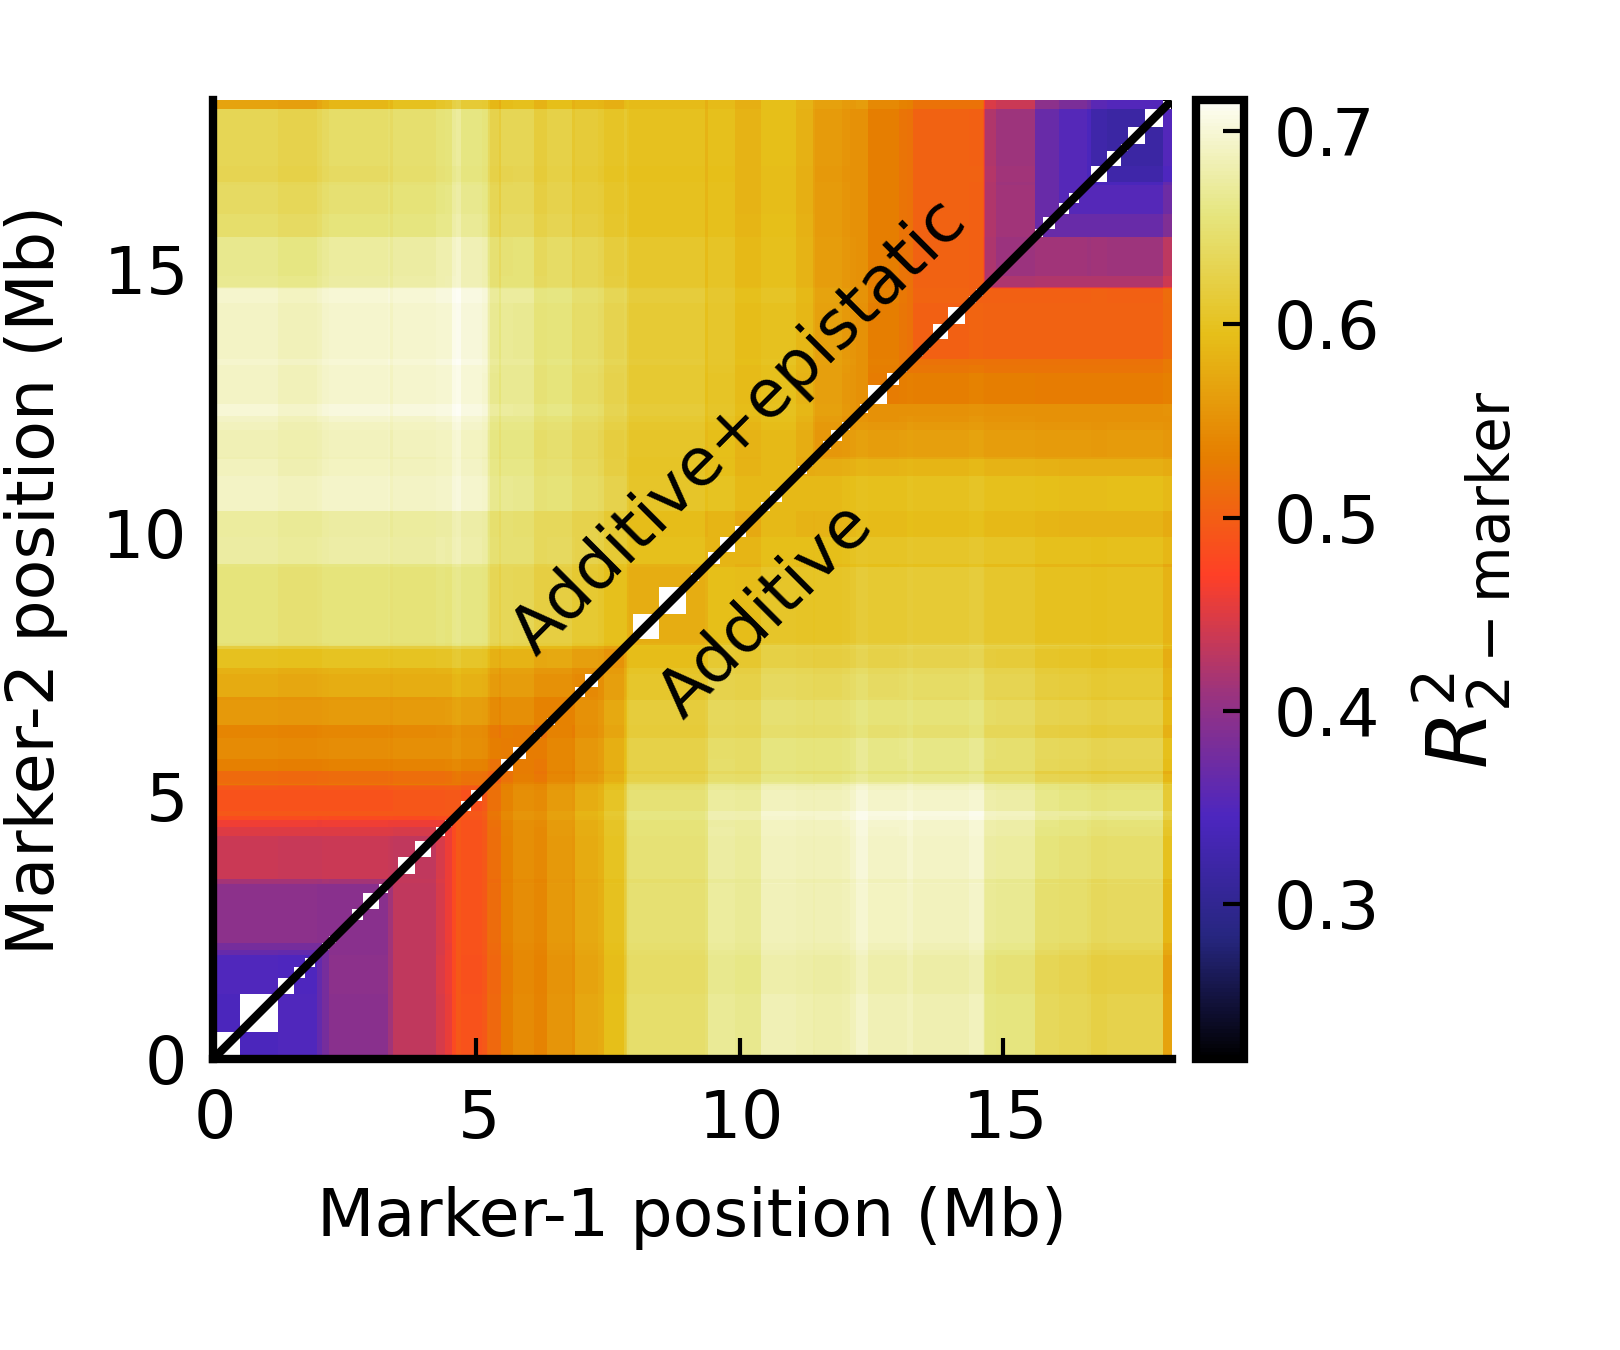

In [146]:
fig = plot(size=(270,225))

c = cgrad(:CMRmap,rev=false)

x = pmap[:,3][end-163:end]

heatmap!(fig,x,x,R2_2qtl_additive_only,color=c,
    # clims=(0,1.25),
    xlims=(0,+Inf),
    ylims=(0,+Inf),
    xlabel="Marker-1 position (Mb)",
    ylabel="Marker-2 position (Mb)",
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    # title="Cross direction: D(DB)",
    colorbar_title=L"R^2_{\mathrm{2-marker}}",
    colorbar_titlefontsize=10,
    titlefontsize=8,
    dpi=600,
    aspect_ratio=1)
heatmap!(fig,x,x,transpose(R2_2qtl_full),color=c,format=:png,
    )
plot!(fig,[0,x[end]],[0,x[end]],label="",linestyle=:solid,linecolor=:black,)

annotate!(fig,[(10.5,8.5,Plots.text("Additive",8,rotation=45))])
annotate!(fig,[(10,12,Plots.text("Additive+epistatic",8,rotation=45))])


In [147]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "DDB.2marker.additive_vs_full.fit"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

## 4.2. Pupal weight in B(BD) females

In [32]:
## get raw data

dir_sub = "Fig3+S8toS10/Fig3A_3B_3C_3D_3E/run.pheno_pupalWeight_BBD"

chr_size = readdlm("$(dir_source_data)/Fig3+S8toS10/chr_size.txt")
chr_size = chr_size[:,1] ./1E6

geno = DataFrame(CSV.File("$(dir_source_data)/$(dir_sub)/genotypes.csv"))[!,2:end]
pmap = DataFrame(CSV.File("$(dir_source_data)/$(dir_sub)/map.physical.csv"))
gmap = DataFrame(CSV.File("$(dir_source_data)/$(dir_sub)/map.genetic.csv"))
covar = DataFrame(CSV.File("$(dir_source_data)/$(dir_sub)/covariates.csv"))
pheno = DataFrame(CSV.File("$(dir_source_data)/$(dir_sub)/phenotypes.csv"));

g = Array(geno .== "DB") .* 1/2 .+ Array(geno .== "BB") .* 0
co = covar[:,2]
p = pheno[!,:Pupal_Weight]


128-element Vector{Float64}:
 0.8452
 0.879
 0.6017
 0.6646
 0.627
 0.9263
 0.8259
 0.6932
 1.2136
 0.8217
 0.8989
 0.8723
 1.013
 ⋮
 2.065
 1.834
 1.172
 0.935
 0.855
 1.492
 1.248
 1.508
 0.77
 0.862
 0.919
 0.88

In [33]:
g_all = Dict()
l_all = Dict()
for chr in 1:30
    g_all["$(chr)"] = g[:,pmap[:,2] .== chr]
    l_all["$(chr)"] = pmap[:,3][pmap[:,2] .== chr]
end

In [34]:
function get_ancestry_chrs(chr_list,g_all,l_all,chr_size)
    chr = chr_list[1]
    cumulative_anc = zeros(size(g_all["$(chr)"])[1])
    L = 0
    for chr in chr_list
        δl = vcat(l_all["$(chr)"][2:end],[chr_size[chr]]) .- l_all["$(chr)"]
        cumulative_anc = cumulative_anc .+ g_all["$(chr)"] * (δl)
        L = L + sum(δl)
    end
    return cumulative_anc ./ L
end

get_ancestry_chrs (generic function with 1 method)

In [35]:
anc_A = get_ancestry_chrs(1:29,g_all,l_all,chr_size)
anc_Z = get_ancestry_chrs([30],g_all,l_all,chr_size) .* 2;

#### 4.2.1. Preprocessing and visualization

In [36]:
# controlling for seasonal variation

data = DataFrame(y = p, x_co = co, x_Z = anc_Z)
ols = lm(@formula(y ~ x_co + x_Z), data)

println(ols)

# adjusting observation by removing the effect of brood

## choose one of the following for analyzing either DDB or BBD
# p_adjusted = p .- coef(ols)[2] .* (co .== "II"); # for DDB
p_adjusted = p .+ coef(ols)[2] .* (co .== "I"); # for BBD

## regress again

data = DataFrame(y = p_adjusted, x_Z = anc_Z)
ols = lm(@formula(y ~ x_Z), data)

println(ols)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x_co + x_Z

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.71927    0.0537324  13.39    <1e-25   0.612927   0.825613
x_co: IV     0.231014   0.0584464   3.95    0.0001   0.115342   0.346687
x_Z          0.86114    0.0544151  15.83    <1e-30   0.753446   0.968835
────────────────────────────────────────────────────────────────────────
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x_Z

Coefficients:
────────────────────────────────────────────────────────────────────────

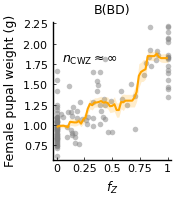

In [37]:
## plot deviation from the pure maternal species weight

xdata = anc_Z
ydata = p_adjusted #.- mean(p_maternal)

wid = 0.2
x_l = -0.1:wid/10:0.9
x_r = x_l .+ wid

x_mid = (x_r.+x_l)/2
ymean = [mean(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
yste = begin
    
    σ = [std(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
    n = [length(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
    σ ./ sqrt.(n)
end

x_mid = x_mid[.!isnan.(ymean)]
yste = yste[.!isnan.(ymean)]
ymean = ymean[.!isnan.(ymean)]


fig = plot(size=(175,200))


scatter!(fig,anc_Z ,p_adjusted,
    markerstrokewidth=0,
    markercolor=:gray,
    markeralpha=0.5,
    label="",
    title="B(BD)",
    titlefontsize=9,
    xguidefontsize=9,
    yguidefontsize=9,
    grid=:off,
    xticks=([0,0.25,0.5,0.75,1],["0","0.25","0.5","0.75","1"]),
    ylabel=string("Female pupal weight"," (g)"),
    xlabel=L"f_Z",
)


plot!((x_r.+x_l)/2,ymean,
    color=:orange,
    linestyle=:solid,
    linewidth=1.5,
    label="")

plot!((x_r.+x_l)/2,ymean.+yste,
    fillrange=ymean.-yste,
    fillcolor=:orange,
    fillalpha=0.2,
    linewidth=0,label="")

annotate!(fig,[(0.05,1.8,Plots.text(L"n_{\mathrm{CWZ}}\approx\infty",9,:left))])

# hline!(fig,[mean(p_maternal)],linecolor=:black,linestyle=:dash,label="")

In [15]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "BBD.WeightAbnormality_ancZ_relation"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

##### 4.2.1.1. Effective number of QTL

In [16]:
idx_Z_1 = anc_Z .>= 1
idx_Z_0 = anc_Z .<= 0;

In [17]:
ΔZ = mean(p_adjusted[idx_Z_1]) - mean(p_adjusted[idx_Z_0])

σ2_mean1 = var(p_adjusted[idx_Z_1])/length(p_adjusted[idx_Z_1])
σ2_mean0 = var(p_adjusted[idx_Z_0])/length(p_adjusted[idx_Z_0])

var_S = var(p_adjusted) - mean([var(p_adjusted[idx_Z_1]),var(p_adjusted[idx_Z_0])])
# var_S = var(p_adjusted) - var(p_adjusted[idx_Z_1])
# var_S = var(p_adjusted) - var(ydata_new) # ydata_new is the detrended dataset

c_bar = 1/6 # average pairwise recombination rate

nCW = (ΔZ^2 - σ2_mean1 - σ2_mean0) / (4*var_S)
nCWZ = 2 * c_bar * nCW / (1-nCW*(1-2*c_bar))

-3.8597651880531494

In [18]:
println("Genetic variance in the unit of [gram]^2:")
println("Expected Vg for a single QTL: ",string(0.25*(ΔZ^2 - σ2_mean1 - σ2_mean0)))
println("Expected Vg for a linear polygenic model: ",string(1/6*(ΔZ^2 - σ2_mean1 - σ2_mean0)))
println("Observed Vg : ",string(var_S))

Genetic variance in the unit of [gram]^2:
Expected Vg for a single QTL: 0.16841976627701333
Expected Vg for a linear polygenic model: 0.11227984418467554
Observed Vg : 0.09773493811989639


##### 4.2.1.2. BayesQTLBIC

In [38]:
marker_range = vcat(1:12:size(g_all["30"])[2],[size(g_all["30"])[2]])
marker_range = unique(marker_range)
print(length(marker_range))
Z_geno = Int.(g_all["30"][:,marker_range].*2)
pheno = p_adjusted

@rput Z_geno
@rput pheno

R"Z_geno";

15

In [39]:
R"""

library("BayesQTLBIC")
library("leaps")

bic_result <- bicreg.qtl(x=Z_geno,y=pheno,OR=1000000000,maxCol=41,
            nbest=500,nvmax=6,prior=0.5,keep.size=1)

"""

@rget bic_result

bic_result_BBD = bic_result;

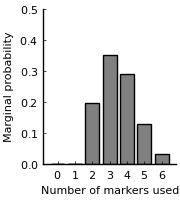

In [40]:
fig = plot(size=(180,200))

bar!(fig,(1:length(bic_result[:postprob_size])) .- 1,bic_result[:postprob_size],
    ylims=(0,0.5),
    label="",
    xlabel="Number of markers used",
    ylabel="Marginal probability",
    fillcolor=:gray,
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    xticks=0:10)

In [22]:
# no need to save the above figure

##### You have to run 4.1 all the way to the end of 4.1.1.2 to draw the following figures

4.1.1.2 will generate variable "bic_result_DDB"

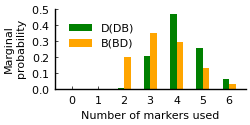

In [41]:
fig = plot(size=(250,125))

bar!(fig,(1:length(bic_result_DDB[:postprob_size])) .-1 .- 0.125 ,bic_result_DDB[:postprob_size],
    ylims=(0,0.5),
    bar_width=0.25,
    xlabel="Model size (number of markers)",
    ylabel="Marginal\nprobability",
    fillcolor=:green,
    linewidth=0,
    label="D(DB)",
    legend_background_color=false,
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    xticks=0:10)

bar!(fig,(1:length(bic_result_BBD[:postprob_size])) .-1 .+ 0.125,bic_result_BBD[:postprob_size],
    ylims=(0,0.5),
    bar_width=0.25,
    xlabel="Number of markers used",
    ylabel="Marginal\nprobability",
    fillcolor=:orange,
    linewidth=0,
    label="B(BD)",
    grid=:off,
    xguidefontsize=8,
    legend=:topleft,
    yguidefontsize=8,
    xticks=0:10)


In [42]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "BBD.DDB.PostProb.ModelSizeOnZ"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

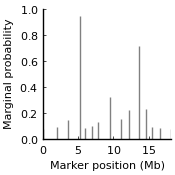

In [43]:
marker_idx = marker_range[parse.(Int64,hcat(split.(bic_result[:namesx],"X")...)[2,:])]
marker_pos = pmap[:,3][end-163:end][marker_idx]

fig = plot(size=(175,175))

plot!(fig,marker_pos,bic_result[:probne0]/100,
    ylims=(0,1),
    xlims=(0,+Inf),
    label="",
    xlabel="Marker position (Mb)",
    ylabel="Marginal probability",
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    color=:gray,
    xticks=[0,5,10,15],
    seriestype=:stem)

In [44]:
# no need to save the above figure

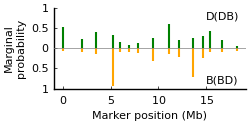

In [45]:
# plot both cross directions together
marker_pos = pmap[:,3][end-163:end]

marker_idx_BBD = marker_range[parse.(Int64,hcat(split.(bic_result_BBD[:namesx],"X")...)[2,:])]
marker_idx_DDB = marker_range[parse.(Int64,hcat(split.(bic_result_DDB[:namesx],"X")...)[2,:])]

fig = plot(size=(250,125))

plot!(fig,marker_pos[marker_idx_DDB],bic_result_DDB[:probne0]/100,
    ylims=(-1,1),
    xlims=(0,+Inf),
    label="",
    xlabel="Marker position (Mb)",
    ylabel="Marginal\nprobability",
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    legend_background_color=false,
    linewidth=1.5,
    color=:green,
    xticks=[0,5,10,15],
    yticks=([-1,-0.5,0,0.5,1],["1","0.5","0","0.5","1"]),
    seriestype=:stem)

plot!(fig,marker_pos[marker_idx_BBD],-bic_result_BBD[:probne0]/100,
    xlims=(-1,pmap[:,3][end]+1),
    label="",
    xlabel="Marker position (Mb)",
    ylabel="Marginal\nprobability",
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    legend_background_color=false,
    color=:orange,
    linewidth=1.5,
    xticks=[0,5,10,15],
    seriestype=:stem)

hline!(fig,[0],label="",linewidth=0.5,linecolor=:gray)

annotate!(fig,[(15,0.8,Plots.text("D(DB)",8,:left,))])
annotate!(fig,[(15,-0.8,Plots.text("B(BD)",8,:left,))])

In [46]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "BBD.DDB.PostProb.MarkerInclusion"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

#### 4.2.2. Regression-based power analysis

##### 4.2.2.1. Computing $R^2_{\text{Z-ancestry}}$

In [47]:
data = DataFrame(y = p, x_co = co, x_Z = anc_Z)
ols = lm(@formula(y ~ x_co + x_Z), data)
R2_Z_anc = r2(ols)

## the following is for BBD
ols

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x_co + x_Z

Coefficients:
────────────────────────────────────────────────────────────────────────
                Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────
(Intercept)  0.71927    0.0537324  13.39    <1e-25   0.612927   0.825613
x_co: IV     0.231014   0.0584464   3.95    0.0001   0.115342   0.346687
x_Z          0.86114    0.0544151  15.83    <1e-30   0.753446   0.968835
────────────────────────────────────────────────────────────────────────

In [48]:
## adjusting observation by removing the effect of brood

p_adjusted = p .- coef(ols)[2] .* (co .== "IV");

## doing linear regression on adjusted p without considering covariates

data = DataFrame(y = p_adjusted, x_Z = anc_Z)
ols = lm(@formula(y ~ x_Z), data)
R2_Z_anc = r2(ols)

0.6753230868257278

##### 4.2.2.2. Defining theoretical curves of $R^2_{\text{n-markers}}/R^2_{\text{Z-ancestry}}$ where n = 1,2,3

In [49]:
R2_1qtl = []
for i in 1:size(g_all["30"])[2]
    data = DataFrame(y = p_adjusted, x_Z = g_all["30"][:,i].*2)
    push!(R2_1qtl, r2(lm(@formula(y ~ x_Z),data)))
end

R2_2qtl = zeros(size(g_all["30"])[2],size(g_all["30"])[2]) .+ NaN

for i in 1:size(g_all["30"])[2]
    for j in (i+1):size(g_all["30"])[2]
        data = DataFrame(y = p_adjusted, x_Z1 = g_all["30"][:,i].*2, x_Z2 = g_all["30"][:,j].*2)
        R2_2qtl[i,j] = r2(lm(@formula(y ~ x_Z1 + x_Z2),data))
    end
end

theory_curve_1(l)=3/8*(1-2*(l-1)*l)^2
theory_curve_2(l1,l2)=3/4*(2*abs(l1 - l2)*(l1 + l2 - 1)^2 + (1 + 2*l1*(1 - l1))*(1+ 
        2*l2*(1-l2)))/(2-abs(l1 - l2))

theory_curve_3(l1,l2,l3)=(3*((1+2*(1-l3)*l3)^2*abs(l1 - l2)^2 + 
     abs(l1-l3)*(8*(l1 - l2)*(-1+l1+l2)*(l2-l3)*(-1+l2+ 
           l3)+(1+2*(1-l2)*l2)^2*abs(l1 - l3)) - 
     2*(4*(l1 - l2)*(-1+l1+l2)*(l1-l3)*(-1+l1+l3)+(1+ 
           2*(1-l1)*l1)*(1+2(1-l2)*l2)*abs(l1 - l3))*abs(l2 - l3)+
        (1+2*(1-l1)*l1)^2*abs(l2-l3)^2- 
     2*abs(l1-l2)*(4*(l1-l3)*(l2-l3)*(-1+l1+l3)*(-1+l2+ 
           l3)+(1+2*(1-l2)*l2)*(1+2*(1-l3)*l3)*abs(l1 - l3)+
            (1+2*(1-l1)*l1)*(1+2*(1-l3)*l3)*abs(l2 - l3))))/(8*(abs(l1-l2)^2+
        (abs(l1-l3)-abs(l2-l3))^2+2*abs(l1 - l2)*(abs(l1 - l3)*(-1+abs(l2-l3))-abs(l2-l3))))

theory_curve_3 (generic function with 1 method)

##### 4.2.2.3. Comparing $R^2_{\text{1-marker}}/R^2_{\text{Z-ancestry}}$ with observed data under the polygenic model

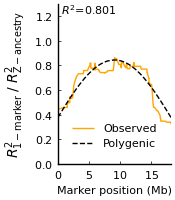

In [50]:
x = pmap[:,3][end-163:end]
y_predicted = theory_curve_1.(x./x[end])
y_observed = R2_1qtl ./ R2_Z_anc

R2_y = round(1-sum((y_predicted.-y_observed).^2)/sum((y_observed .- mean(y_observed)).^2),digits=3)

fig = plot(size=(175,200))
plot!(fig,x,y_observed,color=:orange,
    ylims=(0,1.3),xlims=(0,+Inf),
    xlabel="Marker position (Mb)",
    ylabel=L"R^2_{\mathrm{1-marker}}\;/\;R^2_{\mathrm{Z-ancestry}}",
    yguidefontsize=10,
    xguidefontsize=8,
    legend=:bottom,
    legend_background_color=false,
    label="Observed",
    grid=:off,
    # title="B(BD)",
    titlefontsize=8,
    )
plot!(fig,x,y_predicted,color=:black,
    label="Polygenic",
    linestyle=:dash,
    )
annotate!(fig,[(5,1.25,Plots.text(string(L"R^2","=$(R2_y)"),8))])

In [51]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "BBD.polygenic_model.1marker.fit"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

##### 4.2.2.4. to 4.2.2.5 are omitted (no relevant results)

##### 4.2.2.6. Comparing $R^2_{\text{1-marker}}/R^2_{\text{Z-ancestry}}$ with observed data under the 1-QTL model

In [52]:
x = pmap[:,3][end-163:end]

# searching for the best QTL position by minimizing the sum of squared errors

y_observed = R2_1qtl ./ R2_Z_anc
squared_error = []
QTL_pos = 0:0.01:1
for qtl_pos in QTL_pos
    
    R2_fZ_theory = 3/8*(1+2*qtl_pos*(1-qtl_pos))^2
    theory_curve_1marker_1QTL(l)=(1-abs(l-qtl_pos))^2 / R2_fZ_theory   
    y_predicted = theory_curve_1marker_1QTL.(x./x[end])    
    append!(squared_error,sum((y_observed .- y_predicted).^2))  
end

best_QTL_pos = QTL_pos[findfirst(x->x==minimum(squared_error),squared_error)]
print("Best 1 QTL position: ", best_QTL_pos)
R2_fZ_theory = 3/8*(1+2*best_QTL_pos*(1-best_QTL_pos))^2
theory_curve_1marker_1QTL(l)=(1-abs(l-best_QTL_pos))^2 / R2_fZ_theory 

Best 1 QTL position: 0.5

theory_curve_1marker_1QTL (generic function with 1 method)

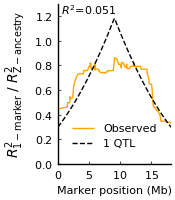

In [53]:
x = pmap[:,3][end-163:end]
y_predicted = theory_curve_1marker_1QTL.(x./x[end])
y_observed = R2_1qtl ./ R2_Z_anc

R2_y = round(1-sum((y_predicted.-y_observed).^2)/sum((y_observed .- mean(y_observed)).^2),digits=3)

fig = plot(size=(175,200))
plot!(fig,x,y_observed,color=:orange,
    ylims=(0,1.3),xlims=(0,+Inf),
    xlabel="Marker position (Mb)",
    ylabel=L"R^2_{\mathrm{1-marker}}\;/\;R^2_{\mathrm{Z-ancestry}}",
    yguidefontsize=10,
    xguidefontsize=8,
    legend=:bottom,
    legend_background_color=false,
    label="Observed",
    grid=:off,
    # title="B(BD)",
    titlefontsize=8,
    )
plot!(fig,x,y_predicted,color=:black,
    label="1 QTL",
    linestyle=:dash,
    )
annotate!(fig,[(5,1.25,Plots.text(string(L"R^2","=$(R2_y)"),8))])

In [54]:
# no need to save the above figure

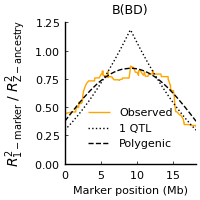

In [57]:
x = pmap[:,3][end-163:end]
y_predicted = theory_curve_1marker_1QTL.(x./x[end])
y_observed = R2_1qtl ./ R2_Z_anc

R2_y = round(1-sum((y_predicted.-y_observed).^2)/sum((y_observed .- mean(y_observed)).^2),digits=3)

fig = plot(size=(200,200))
plot!(fig,x,y_observed,color=:orange,
    ylims=(0,1.25),xlims=(0,+Inf),
    xlabel="Marker position (Mb)",
    ylabel=L"R^2_{\mathrm{1-marker}}\;/\;R^2_{\mathrm{Z-ancestry}}",
    yguidefontsize=10,
    xguidefontsize=8,
    legend=:bottom,
    legend_background_color=false,
    label="Observed",
    grid=:off,
    title="B(BD)",
    titlefontsize=9,
    )

plot!(fig,x,y_predicted,color=:black,
    label="1 QTL",
    linestyle=:dot,
    )

# annotate!(fig,[(1,1.4,Plots.text(string(L"R^2_{\mathrm{1QTL}}","=$(R2_y)"),8,:left))])

# overlaying the polygenic model

y_predicted = theory_curve_1.(x./x[end])
R2_y = round(1-sum((y_predicted.-y_observed).^2)/sum((y_observed .- mean(y_observed)).^2),digits=3)

plot!(fig,x,y_predicted,color=:black,
    label="Polygenic",
    linestyle=:dash,
    )

# annotate!(fig,[(1,1.25,Plots.text(string(L"R^2_{\mathrm{polygenic}}","=$(R2_y)"),8,:left))])

In [58]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "BBD.1QTL_polygenic_models.1marker.fit"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

##### 4.2.2.7. Comparing $R^2_{\text{2-markers}}/R^2_{\text{Z-ancestry}}$ with observed data under the 2-QTL model

In [59]:
ρ(l1,l2)=1-abs(l1-l2)

ρ_x1_to_x2andx3(l1,l2,l3,b) = begin
    
    # correlation coefficient between
    # anc(l1)
    # and
    # linear combination: anc(l2) + b * anc(l3)
    
    (ρ(l1,l2) + b*ρ(l1,l3))/sqrt(1+b^2+2*b*ρ(l2,l3))
     
end

R2_y1_plus_b_times_y2(l1,l2,ly1,ly2,b) = begin
    
    # R^2 values of regression with
    # target variable: anc(ly1) + b*anc(ly2)
    # two additive variable: anc(l1) and anc(l2)
    
    X = [ρ_x1_to_x2andx3(l1,ly1,ly2,b),ρ_x1_to_x2andx3(l2,ly1,ly2,b)]
    
    A = [1 ρ(l1,l2);
         ρ(l1,l2) 1]
    
    transpose(X)*inv(A)*X
    
end

R2_fZ(ly1,ly2,b) = begin
    
    3/8 * (1+2*ly1*(1-ly1)+b*(1+2*ly2*(1-ly2)))^2 / (1+b^2+2*b*ρ(ly1,ly2))
    
end

R2_fZ (generic function with 1 method)

In [60]:
x = pmap[:,3][end-163:end]

R2_2markers_observed = []

for i in 1:size(g_all["30"])[2]
    for j in (i+1):size(g_all["30"])[2]
        append!(R2_2markers_observed,R2_2qtl[i,j])
    end
end

# optimizing ly1,ly2,b

ly1_range = 0:0.01:1
ly2_range = 0:0.01:1
b_range = 1:1

ly1_best = 0
ly2_best = 0
b_best = 0

squared_error = +Inf

@showprogress 1 for ly1 in ly1_range
    for ly2 in ly2_range
        for b in b_range
            
            R2_predicted_2markers = [] 
            
            R2_fZ_predicted = R2_fZ(ly1,ly2,b)
            
            for i in 1:size(g_all["30"])[2]
                for j in (i+1):size(g_all["30"])[2]
                    append!(R2_predicted_2markers, 
                        R2_y1_plus_b_times_y2(x[i]./x[end],x[j]./x[end],ly1,ly2,b))
                end
            end
            
            squared_error_new = sum((R2_predicted_2markers./R2_fZ_predicted .- R2_2markers_observed./R2_Z_anc).^2)
            
            if squared_error_new < squared_error
                
                squared_error = squared_error_new
                
                ly1_best = ly1
                ly2_best = ly2
                b_best = b
                
                # print([ly1_best,ly2_best,b_best,squared_error])
                # print("\n")
            end
                        
        end
    end
end


Progress: 100%|█████████████████████████████████████████| Time: 0:09:36


In [61]:
println("The first best QTL position: ",ly1_best)
println("The second best QTL position: ",ly2_best)
# println("Effect size of second QTL relative to the first: ", b_best)

The first best QTL position: 0.23
The second best QTL position: 0.73


In [62]:
ly1_best = 0.23
ly2_best = 0.73
b_best = 1

x = pmap[:,3][end-163:end]

y_predicted_2qtl = zeros(size(g_all["30"])[2],size(g_all["30"])[2]) .+ NaN


R2_fZ_predicted = R2_fZ(ly1_best,ly2_best,b_best)
for i in 1:size(g_all["30"])[2]
    for j in (i+1):size(g_all["30"])[2]
        y_predicted_2qtl[j,i] = R2_y1_plus_b_times_y2(x[i]./x[end],x[j]./x[end],ly1_best,ly2_best,b_best)/R2_fZ_predicted
    end
end

y_observed_reshaped = reshape(R2_2qtl ./ R2_Z_anc,length(R2_2qtl))
y_predicted_2qtl_reshaped = reshape(transpose(y_predicted_2qtl),length(transpose(y_predicted_2qtl)))

y_observed_reshaped = y_observed_reshaped[.!isnan.(y_observed_reshaped)]
y_predicted_2qtl_reshaped = y_predicted_2qtl_reshaped[.!isnan.(y_predicted_2qtl_reshaped)]

R2_y = round(1-sum((y_predicted_2qtl_reshaped .- y_observed_reshaped).^2)/sum((y_observed_reshaped .- mean(y_observed_reshaped)).^2),digits=3)


0.882

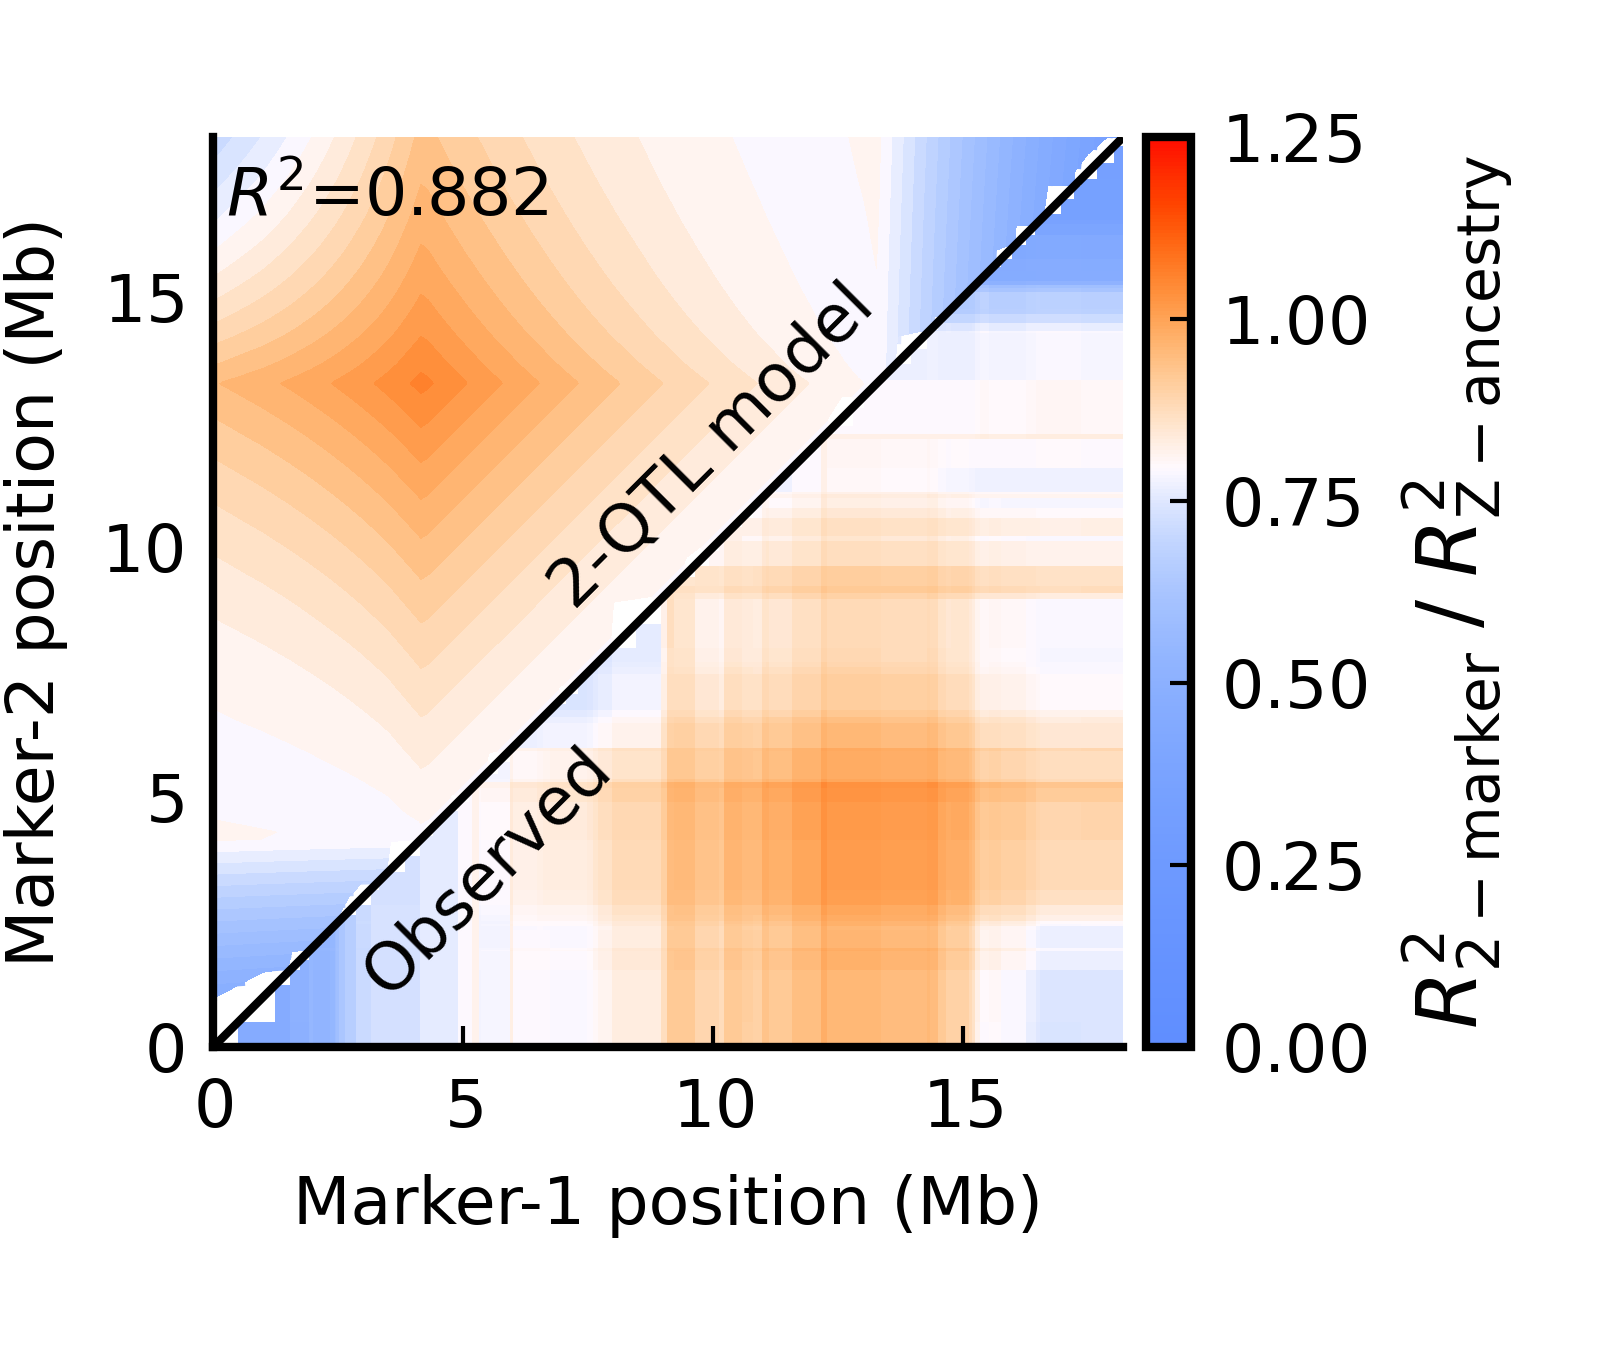

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [63]:
fig = plot(size=(270,225))

# c = cgrad(:island,rev=true)
# c = cgrad(:tab20c)
c = cgrad(:blackbody,rev=true)
heatmap!(fig,x,x,R2_2qtl ./ R2_Z_anc,color=c,
    clims=(0,1.25),
    xlims=(0,+Inf),
    ylims=(0,+Inf),
    xlabel="Marker-1 position (Mb)",
    ylabel="Marker-2 position (Mb)",
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    # title="Cross direction: B(BD)",
    colorbar_title=L"R^2_{\mathrm{2-marker}}\;/\;R^2_{\mathrm{Z-ancestry}}",
    colorbar_titlefontsize=10,
    titlefontsize=8,
    dpi=600,
    aspect_ratio=1)
contour!(fig,x,x,y_predicted_2qtl,color=c,format=:png,
    fill=true,
    levels=30,
)
plot!(fig,[0,x[end]],[0,x[end]],label="",linestyle=:solid,linecolor=:black,)

annotate!(fig,[(5.5,3.5,Plots.text("Observed",8,rotation=45))])
annotate!(fig,[(10,12,Plots.text("2-QTL model",8,rotation=45))])

annotate!(fig,[(3.5,17,Plots.text(string(L"R^2","=$(R2_y)"),8))])

In [64]:
# no need to save the above figure

##### 4.2.2.8. Comparing $R^2_{\text{1-marker}}/R^2_{\text{Z-ancestry}}$ with observed data under the 2-QTL model

Positions of the two markers correspond to the previous section 4.2.2.7.

In [65]:
theory_curve_2QTL_1marker(l,l1,l2)=begin
    
    # l: marker position
    # l1,l2: QTL positions
    # QTLs are additive with equal phenotypic effects
    
    R2_num = (2-abs(l-l1)-abs(l-l2))^2/(2+2*(1-abs(l1-l2)))
    R2_denom = 3/8 * (2+2*l1*(1-l1)+2*l2*(1-l2))^2/(2+2*(1-abs(l1-l2)))
    
    R2_num/R2_denom
    
end

theory_curve_2QTL_1marker (generic function with 1 method)

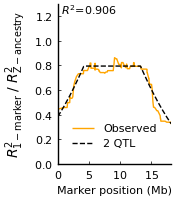

In [66]:
x = pmap[:,3][end-163:end]
y_predicted = theory_curve_2QTL_1marker.(x./x[end],ly1_best,ly2_best)
y_observed = R2_1qtl ./ R2_Z_anc

R2_y = round(1-sum((y_predicted.-y_observed).^2)/sum((y_observed .- mean(y_observed)).^2),digits=3)

fig = plot(size=(175,200))
plot!(fig,x,y_observed,color=:orange,
    ylims=(0,1.3),xlims=(0,+Inf),
    xlabel="Marker position (Mb)",
    ylabel=L"R^2_{\mathrm{1-marker}}\;/\;R^2_{\mathrm{Z-ancestry}}",
    yguidefontsize=10,
    xguidefontsize=8,
    legend=:bottom,
    legend_background_color=false,
    label="Observed",
    grid=:off,
    # title="B(BD)",
    titlefontsize=8,
    )
plot!(fig,x,y_predicted,color=:black,
    label="2 QTL",
    linestyle=:dash,
    )

annotate!(fig,[(5,1.25,Plots.text(string(L"R^2","=$(R2_y)"),8))])

In [67]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "BBD.2QTL_model.1marker.fit"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

##### 4.2.2.9. Comparing 2-marker scans with additive-only or additive+epistatic models 

In [68]:
R2_2qtl_additive_only = zeros(size(g_all["30"])[2],size(g_all["30"])[2]) .+ NaN
R2_2qtl_full = zeros(size(g_all["30"])[2],size(g_all["30"])[2]) .+ NaN

for i in 1:size(g_all["30"])[2]
    for j in (i+1):size(g_all["30"])[2]
        data = DataFrame(y = p_adjusted, x_Z1 = g_all["30"][:,i].*2, x_Z2 = g_all["30"][:,j].*2)
        R2_2qtl_additive_only[i,j] = r2(lm(@formula(y ~ x_Z1 + x_Z2),data))
        R2_2qtl_full[i,j] = r2(lm(@formula(y ~ x_Z1 + x_Z2 + x_Z1 & x_Z2),data))
    end
end

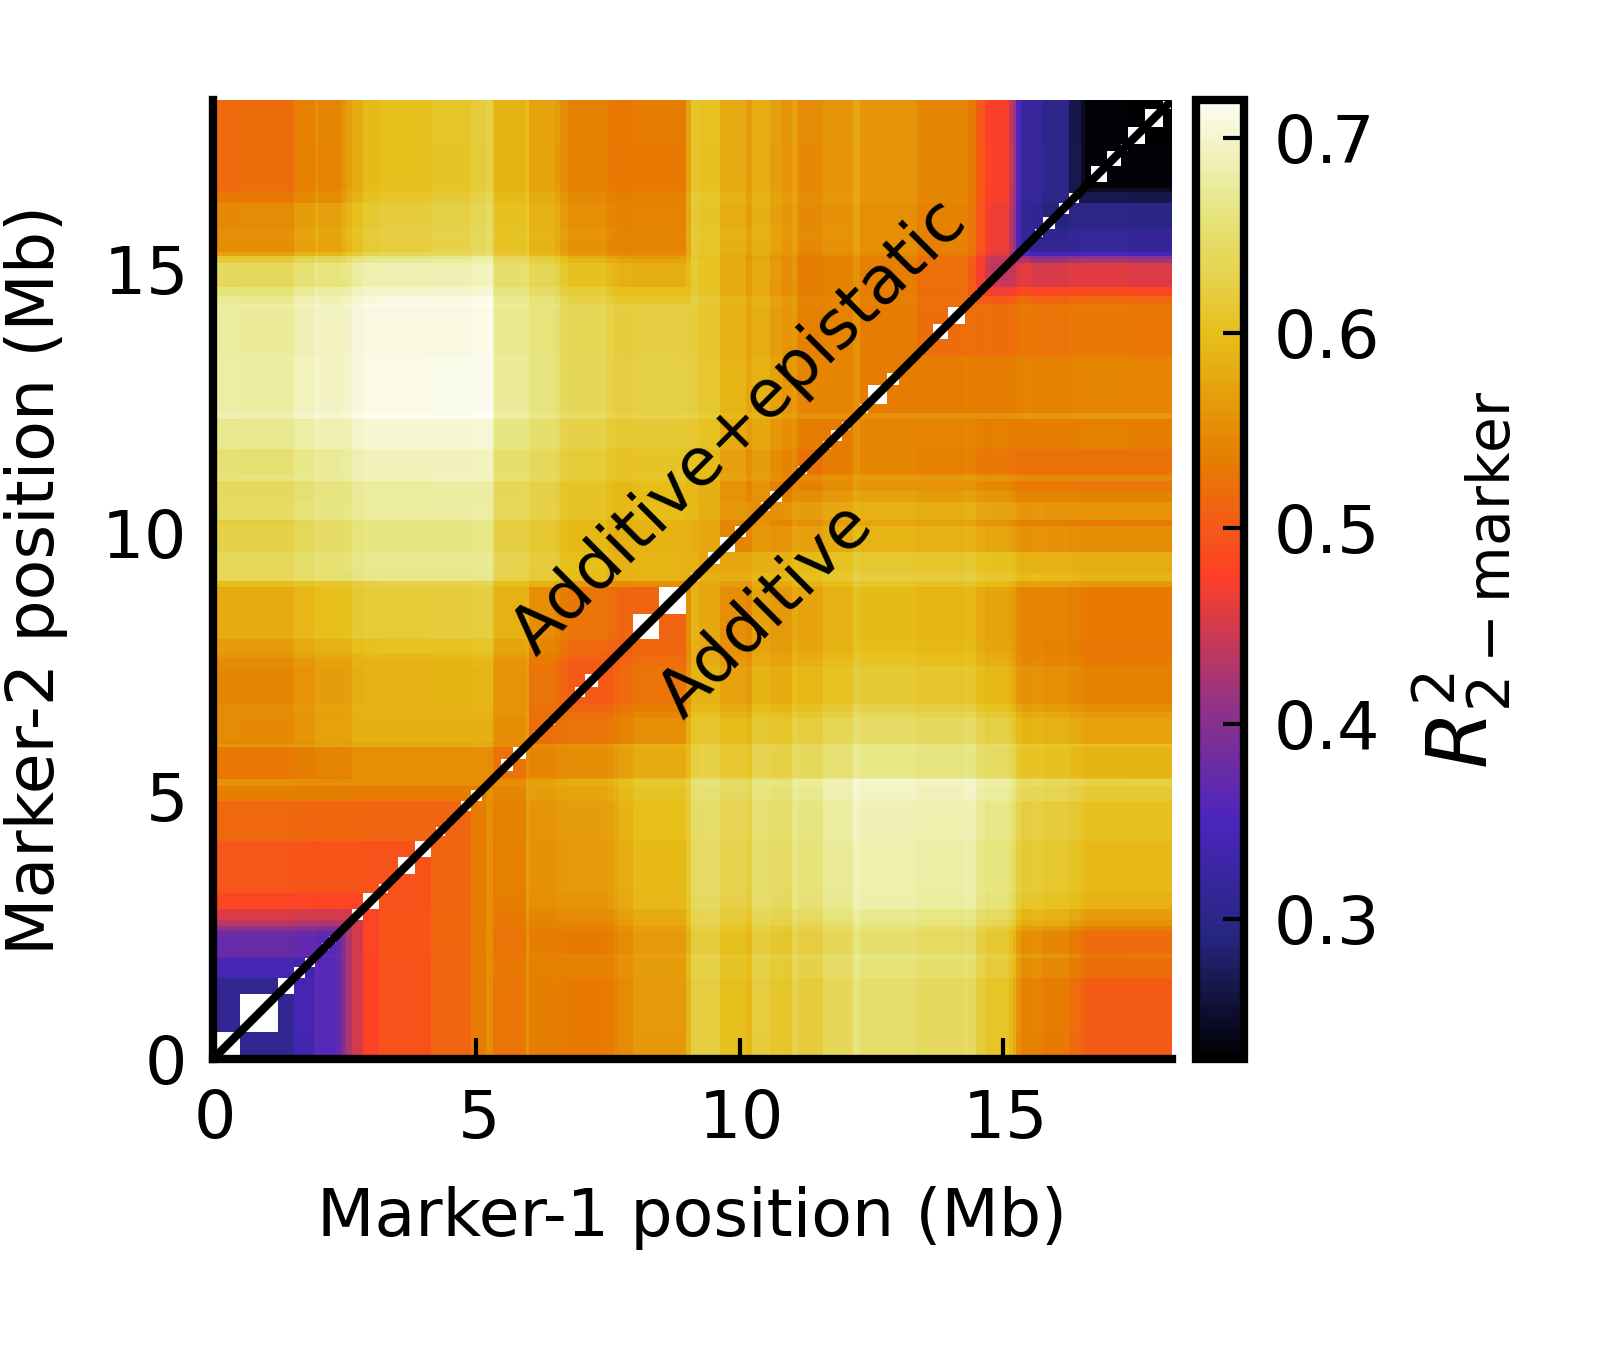

In [69]:
fig = plot(size=(270,225))

# c = cgrad(:island,rev=true)
# c = cgrad(:tab20c)

c = cgrad(:CMRmap,rev=false)

x = pmap[:,3][end-163:end]

heatmap!(fig,x,x,R2_2qtl_additive_only,color=c,
    # clims=(0,1.25),
    xlims=(0,+Inf),
    ylims=(0,+Inf),
    xlabel="Marker-1 position (Mb)",
    ylabel="Marker-2 position (Mb)",
    grid=:off,
    xguidefontsize=8,
    yguidefontsize=8,
    # title="Cross direction: D(DB)",
    colorbar_title=L"R^2_{\mathrm{2-marker}}",
    colorbar_titlefontsize=10,
    titlefontsize=8,
    dpi=600,
    aspect_ratio=1)
heatmap!(fig,x,x,transpose(R2_2qtl_full),color=c,format=:png,
    )
plot!(fig,[0,x[end]],[0,x[end]],label="",linestyle=:solid,linecolor=:black,)

annotate!(fig,[(10.5,8.5,Plots.text("Additive",8,rotation=45))])
annotate!(fig,[(10,12,Plots.text("Additive+epistatic",8,rotation=45))])

# annotate!(fig,[(3.5,17,Plots.text(string(L"R^2","=$(R2_y)"),8))])

In [70]:
dir_output = "$(dir_source_data)/Fig3+S8toS10/Fig3A_3B_3C_3D_3E"

fig_name = "BBD.2marker.additive_vs_full.fit"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

# 5. Plotting pupal weight variation

In [71]:
using KernelDensity
using StatsPlots
using HypothesisTests

In [72]:
ste(u)=std(u)/sqrt(length(u))

ste (generic function with 1 method)

In [77]:
df = DataFrame(CSV.File("$(dir_source_data)/Fig1/Fig1C/AllPupalWeight.csv"))

w_fB = df[!,3][(df[!,2] .== "F") .& (df[!,1] .== "B")]
w_mB = df[!,3][(df[!,2] .== "M") .& (df[!,1] .== "B")]

w_fD = df[!,3][(df[!,2] .== "F") .& (df[!,1] .== "D")]
w_mD = df[!,3][(df[!,2] .== "M") .& (df[!,1] .== "D")]

w_fBD = df[!,3][(df[!,2] .== "F") .& (df[!,1] .== "BD")]
w_mBD = df[!,3][(df[!,2] .== "M") .& (df[!,1] .== "BD")]

w_fDB = df[!,3][(df[!,2] .== "F") .& (df[!,1] .== "DB")]
w_mDB = df[!,3][(df[!,2] .== "M") .& (df[!,1] .== "DB")]

w_fBBD = df[!,3][(df[!,2] .== "F") .& (df[!,1] .== "B(BD)")]
w_mBBD = df[!,3][(df[!,2] .== "M") .& (df[!,1] .== "B(BD)")]

w_fDDB = df[!,3][(df[!,2] .== "F") .& (df[!,1] .== "D(DB)")]
w_mDDB = df[!,3][(df[!,2] .== "M") .& (df[!,1] .== "D(DB)")]

w_fBBD = w_fBBD[.!ismissing.(w_fBBD)]
w_mBBD = w_mBBD[.!ismissing.(w_mBBD)]
w_fDDB = w_fDDB[.!ismissing.(w_fDDB)]
w_mDDB = w_mDDB[.!ismissing.(w_mDDB)]
w_fBD = w_fBD[.!ismissing.(w_fBD)]
w_mBD = w_mBD[.!ismissing.(w_mBD)]
w_fB = w_fB[.!ismissing.(w_fB)]
w_mB = w_mB[.!ismissing.(w_mB)]
w_fD = w_fD[.!ismissing.(w_fD)]
w_mD = w_mD[.!ismissing.(w_mD)];

In [78]:
# BBD: nongenetic_proportion = 0.6753230868257278
# DDB: nongenetic_proportion = 0.7247579087214295

function get_geneticVarRatio(Wf,Wm,nongenetic_proportion)

    var_env = var(Wf)*(1-nongenetic_proportion)
    var_f = var(Wf)
    var_m = var(Wm)

    return (var_m-var_env)/(var_f-var_env)
    
end

get_geneticVarRatio (generic function with 1 method)

In [95]:
# bootstrap

n_boostraps = 100000

outputs = []

Wf = w_fBBD
Wm = w_mBBD
nongenetic_proportion = 0.6753230868257278

for i in 1:n_boostraps
    
    
    Wf_1 = Wf[Int.(ceil.(rand(size(Wf)[1])*length(Wf)))]
    Wm_1 = Wm[Int.(ceil.(rand(size(Wm)[1])*length(Wm)))]
    push!(outputs,get_geneticVarRatio(Wf_1,Wm_1,nongenetic_proportion))
    
end

println("Statistics: ")
println(get_geneticVarRatio(Wf,Wm,nongenetic_proportion))
println("95% CI: ")
println(quantile(float.(outputs),0.025))
println(quantile(float.(outputs),0.975))

Statistics: 
0.2254992191740431
95% CI: 
0.05067204960175191
0.4587861021527622


In [79]:
UnequalVarianceTTest(w_fB,w_fBD)


Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -0.265357
    95% confidence interval: (-0.4452, -0.08549)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0071

Details:
    number of observations:   [6,14]
    t-statistic:              -3.1865577445527493
    degrees of freedom:       13.02822011354267
    empirical standard error: 0.08327391628498079


In [80]:
UnequalVarianceTTest(w_fB,w_fDB)


Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.777825
    95% confidence interval: (0.5357, 1.02)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0002

Details:
    number of observations:   [6,4]
    t-statistic:              7.748549665260596
    degrees of freedom:       6.38551074600993
    empirical standard error: 0.10038330185676633


In [81]:
UnequalVarianceTTest(w_mB,w_mBD)


Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          6.85714e-5
    95% confidence interval: (-0.1136, 0.1138)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.9990

Details:
    number of observations:   [7,25]
    t-statistic:              0.001326155008368457
    degrees of freedom:       11.096002315730685
    empirical standard error: 0.05170694838766474


In [82]:
UnequalVarianceTTest(w_mB,w_mDB)


Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.159079
    95% confidence interval: (-0.03322, 0.3514)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.0889

Details:
    number of observations:   [7,4]
    t-statistic:              2.0401662397176277
    degrees of freedom:       5.812104711589255
    empirical standard error: 0.07797333782495545


In [83]:
UnequalVarianceTTest(w_fD,w_fBD)

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.241865
    95% confidence interval: (0.1119, 0.3718)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0010

Details:
    number of observations:   [9,14]
    t-statistic:              3.9059017159709506
    degrees of freedom:       18.296148945702605
    empirical standard error: 0.06192298141453747


In [84]:
UnequalVarianceTTest(w_fD,w_fDB)

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          1.28505
    95% confidence interval: (1.047, 1.523)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0002

Details:
    number of observations:   [9,4]
    t-statistic:              15.384858608837506
    degrees of freedom:       3.7400271213926963
    empirical standard error: 0.08352674892208979


In [85]:
UnequalVarianceTTest(w_mD,w_mBD)

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.309783
    95% confidence interval: (0.2279, 0.3916)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-06

Details:
    number of observations:   [7,25]
    t-statistic:              7.931939732020221
    degrees of freedom:       18.612038244693828
    empirical standard error: 0.039055119883513935


In [86]:
UnequalVarianceTTest(w_mD,w_mDB)

Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.468793
    95% confidence interval: (0.2768, 0.6608)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0023

Details:
    number of observations:   [7,4]
    t-statistic:              6.675593963098661
    degrees of freedom:       4.163890389903538
    empirical standard error: 0.07022489080885529


In [87]:
UnequalVarianceTTest(w_fBBD,w_mBBD)


Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          0.158859
    95% confidence interval: (0.07601, 0.2417)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0002

Details:
    number of observations:   [131,154]
    t-statistic:              3.7782772880255306
    degrees of freedom:       225.36717683303627
    empirical standard error: 0.04204532003697253


In [88]:
UnequalVarianceTTest(w_fDDB,w_mDDB)


Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          -0.116464
    95% confidence interval: (-0.2047, -0.02821)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0099

Details:
    number of observations:   [158,168]
    t-statistic:              -2.5974554518017174
    degrees of freedom:       287.51924889080834
    empirical standard error: 0.04483783759736874


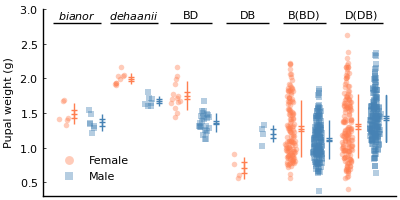

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

In [89]:
fig = plot(size=(400,200),
    ylabel="Pupal weight (g)",
    ylims=(0.3,3),
    yguidefontsize=8,
    xticks=[],
    grid=:off,)

X=Array(-3:8).*2

x = 0.75

c1=:steelblue
c2=:coral
msize=5

mtype2=:square


dotplot!(fig,[X[1]],w_fB,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c2,
    legend=:bottomleft,
    legend_background_color=false,
    label="Female")
plot!(fig,repeat([X[1]],3).+x,[mean(w_fB)-ste(w_fB),mean(w_fB),mean(w_fB)+ste(w_fB)],
    marker=:hline,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)
plot!(fig,repeat([X[1]],2).+x,[mean(w_fB)-std(w_fB),mean(w_fB)+std(w_fB)],
    marker=:none,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)

dotplot!(fig,[X[2]],w_mB,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c1,
    marker=mtype2,
    label="Male")
plot!(fig,repeat([X[2]],3).+x,[mean(w_mB)-ste(w_mB),mean(w_mB),mean(w_mB)+ste(w_mB)],
    marker=:hline,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)
plot!(fig,repeat([X[2]],2).+x,[mean(w_mB)-std(w_mB),mean(w_mB)+std(w_mB)],
    marker=:none,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)

dotplot!(fig,[X[3]],w_fD,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c2,
    legend=:bottomleft,
    legend_background_color=false,
    label="")
plot!(fig,repeat([X[3]],3).+x,[mean(w_fD)-ste(w_fD),mean(w_fD),mean(w_fD)+ste(w_fD)],
    marker=:hline,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)
plot!(fig,repeat([X[3]],2).+x,[mean(w_fD)-std(w_fD),mean(w_fD)+std(w_fD)],
    marker=:none,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)

dotplot!(fig,[X[4]],w_mD,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c1,
    marker=mtype2,
    label="")
plot!(fig,repeat([X[4]],3).+x,[mean(w_mD)-ste(w_mD),mean(w_mD),mean(w_mD)+ste(w_mD)],
    marker=:hline,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)
plot!(fig,repeat([X[4]],2).+x,[mean(w_mD)-std(w_mD),mean(w_mD)+std(w_mD)],
    marker=:none,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)


dotplot!(fig,[X[5]],w_fBD,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c2,
    legend=:bottomleft,
    legend_background_color=false,
    label="")
plot!(fig,repeat([X[5]],3).+x,[mean(w_fBD)-ste(w_fBD),mean(w_fBD),mean(w_fBD)+ste(w_fBD)],
    marker=:hline,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)
plot!(fig,repeat([X[5]],2).+x,[mean(w_fBD)-std(w_fBD),mean(w_fBD)+std(w_fBD)],
    marker=:none,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)

dotplot!(fig,[X[6]],w_mBD,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c1,
    marker=mtype2,
    label="")
plot!(fig,repeat([X[6]],3).+x,[mean(w_mBD)-ste(w_mBD),mean(w_mBD),mean(w_mBD)+ste(w_mBD)],
    marker=:hline,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)
plot!(fig,repeat([X[6]],2).+x,[mean(w_mBD)-std(w_mBD),mean(w_mBD)+std(w_mBD)],
    marker=:none,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)

dotplot!(fig,[X[7]],w_fDB,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c2,
    label="")
plot!(fig,repeat([X[7]],3).+x,[mean(w_fDB)-ste(w_fDB),mean(w_fDB),mean(w_fDB)+ste(w_fDB)],
    marker=:hline,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)
plot!(fig,repeat([X[7]],2).+x,[mean(w_fDB)-std(w_fDB),mean(w_fDB)+std(w_fDB)],
    marker=:none,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)

dotplot!(fig,[X[8]],w_mDB,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c1,
    marker=mtype2,
    label="")
plot!(fig,repeat([X[8]],3).+x,[mean(w_mDB)-ste(w_mDB),mean(w_mDB),mean(w_mDB)+ste(w_mDB)],
    marker=:hline,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)
plot!(fig,repeat([X[8]],2).+x,[mean(w_mDB)-std(w_mDB),mean(w_mDB)+std(w_mDB)],
    marker=:none,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)


dotplot!(fig,[X[9]],w_fBBD,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c2,
    label="")
plot!(fig,repeat([X[9]],3).+x,[mean(w_fBBD)-ste(w_fBBD),mean(w_fBBD),mean(w_fBBD)+ste(w_fBBD)],
    marker=:hline,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)
plot!(fig,repeat([X[9]],2).+x,[mean(w_fBBD)-std(w_fBBD),mean(w_fBBD)+std(w_fBBD)],
    marker=:none,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)

dotplot!(fig,[X[10]],w_mBBD,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c1,
    marker=mtype2,
    label="")
plot!(fig,repeat([X[10]],3).+x,[mean(w_mBBD)-ste(w_mBBD),mean(w_mBBD),mean(w_mBBD)+ste(w_mBBD)],
    marker=:hline,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)
plot!(fig,repeat([X[10]],2).+x,[mean(w_mBBD)-std(w_mBBD),mean(w_mBBD)+std(w_mBBD)],
    marker=:none,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)


dotplot!(fig,[X[11]],w_fDDB,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c2,
    label="")
plot!(fig,repeat([X[11]],3).+x,[mean(w_fDDB)-ste(w_fDDB),mean(w_fDDB),mean(w_fDDB)+ste(w_fDDB)],
    marker=:hline,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)
plot!(fig,repeat([X[11]],2).+x,[mean(w_fDDB)-std(w_fDDB),mean(w_fDDB)+std(w_fDDB)],
    marker=:none,markerstrokewidth=1,markercolor=c2,markersize=msize,
    label="",linecolor=c2,linewidth=1)


dotplot!(fig,[X[12]],w_mDDB,alpha=0.4,markerstrokewidth=0,side=:both,
    color=c1,
    marker=mtype2,
    label="")
plot!(fig,repeat([X[12]],3).+x,[mean(w_mDDB)-ste(w_mDDB),mean(w_mDDB),mean(w_mDDB)+ste(w_mDDB)],
    marker=:hline,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)
plot!(fig,repeat([X[12]],3).+x,[mean(w_mDDB)-std(w_mDDB),mean(w_mDDB)+std(w_mDDB)],
    marker=:none,markerstrokewidth=1,markercolor=c1,markersize=msize,
    label="",linecolor=c1,linewidth=1)

ann_x = [(X[i]+X[i+1])/2 for i in 1:2:11]
ann_y = [2.9,2.9,2.9,2.9,2.9,2.9]

annotate!(fig,[(ann_x[1],ann_y[1],Plots.text(L"bianor",8)),
                (ann_x[2],ann_y[2],Plots.text(L"dehaanii",8)),
                (ann_x[3],ann_y[3],Plots.text("BD",8)),
                (ann_x[4],ann_y[4],Plots.text("DB",8)),
                (ann_x[5],ann_y[5],Plots.text("B(BD)",8)),
                (ann_x[6],ann_y[6],Plots.text("D(DB)",8))])

plot!(fig,[X[1]-0.7,X[2]+0.7],[ann_y[1],ann_y[1]].-0.1,label="",color=:black,)
plot!(fig,[X[3]-0.7,X[4]+0.7],[ann_y[2],ann_y[2]].-0.1,label="",color=:black,)
plot!(fig,[X[1+4]-0.5,X[2+4]+0.5],[ann_y[1+2],ann_y[1+2]].-0.1,label="",color=:black,)
plot!(fig,[X[3+4]-0.5,X[4+4]+0.5],[ann_y[2+2],ann_y[2+2]].-0.1,label="",color=:black,)
plot!(fig,[X[5+4]-0.5,X[6+4]+0.5],[ann_y[3+2],ann_y[3+2]].-0.1,label="",color=:black,)
plot!(fig,[X[7+4]-0.5,X[8+4]+0.5],[ann_y[4+2],ann_y[4+2]].-0.1,label="",color=:black,)


## test for differences between pure lines and F1

# # females

# y0 = 2.675
# plot!(fig,[X[1],X[5]],[y0,y0],label="",
#     linecolor=c2,
#     marker=:vline,
#     markercolor=c2,
#     annotations=[(X[1]+0.5,y0+0.05,Plots.text(L"**",8,c2,:left))],#p=0.0071 
# )

# y0 = 2.675 - 0.125*1
# plot!(fig,[X[1],X[7]],[y0,y0],label="",
#     linecolor=c2,
#     marker=:vline,
#     markercolor=c2,
#     annotations=[(X[1]+0.5,y0+0.05,Plots.text(L"**",8,c2,:left))],#p=0.0002 
# )

# # males

# y0 = 1.05
# plot!(fig,[X[2],X[6]],[y0,y0],label="",
#     linecolor=c1,
#     marker=:vline,
#     markercolor=c1,
#     annotations=[(X[2]+0.5,y0+0.05,Plots.text("n.s.",8,c1,:left))],#p=0.999   
# )

# y0 = 1.05 - 0.125*1
# plot!(fig,[X[2],X[8]],[y0,y0],label="",
#     linecolor=c1,
#     marker=:vline,
#     markercolor=c1,
#     annotations=[(X[2]+0.5,y0+0.05,Plots.text("n.s.",8,c1,:left))],#p=0.999   
# )



fig

In [92]:
dir_output = "$(dir_source_data)/Fig1/Fig1C"

fig_name = "Pupal_weight"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

In [93]:
ΔwDB_B_f = mean(w_fDB) - mean(w_fB)
ΔwDB_D_f = mean(w_fDB) - mean(w_fD)
ΔwBD_B_f = mean(w_fBD) - mean(w_fB)
ΔwBD_D_f = mean(w_fBD) - mean(w_fD)
ΔwDB_B_m = mean(w_mDB) - mean(w_mB)
ΔwDB_D_m = mean(w_mDB) - mean(w_mD)
ΔwBD_B_m = mean(w_mBD) - mean(w_mB)
ΔwBD_D_m = mean(w_mBD) - mean(w_mD)

-0.30978285714285714

In [94]:
ste_ΔwDB_B_f = sqrt(ste(w_fDB)^2 + ste(w_fB)^2)
ste_ΔwDB_D_f = sqrt(ste(w_fDB)^2 + ste(w_fD)^2)
ste_ΔwBD_B_f = sqrt(ste(w_fBD)^2 + ste(w_fB)^2)
ste_ΔwBD_D_f = sqrt(ste(w_fBD)^2 + ste(w_fD)^2)
ste_ΔwDB_B_m = sqrt(ste(w_mDB)^2 + ste(w_mB)^2)
ste_ΔwDB_D_m = sqrt(ste(w_mDB)^2 + ste(w_mD)^2)
ste_ΔwBD_B_m = sqrt(ste(w_mBD)^2 + ste(w_mB)^2)
ste_ΔwBD_D_m = sqrt(ste(w_mBD)^2 + ste(w_mD)^2)

0.039055119883513935

In [95]:
using Printf

In [96]:
ste_ΔwDB_B_fVSm = sqrt(ste(w_fDB)^2 + ste(w_fB)^2+ste(w_mDB)^2 + ste(w_mB)^2)
ste_ΔwBD_B_fVSm = sqrt(ste(w_fBD)^2 + ste(w_fB)^2+ste(w_mBD)^2 + ste(w_mB)^2)
ste_ΔwDB_D_fVSm = sqrt(ste(w_fDB)^2 + ste(w_fD)^2+ste(w_mDB)^2 + ste(w_mD)^2)
ste_ΔwBD_D_fVSm = sqrt(ste(w_fBD)^2 + ste(w_fD)^2+ste(w_mBD)^2 + ste(w_mD)^2)
μ_ΔwDB_B_fVSm = ΔwDB_B_f - ΔwDB_B_m
μ_ΔwBD_B_fVSm = ΔwBD_B_f - ΔwBD_B_m
μ_ΔwDB_D_fVSm = ΔwDB_D_f - ΔwDB_D_m
μ_ΔwBD_D_fVSm = ΔwBD_D_f - ΔwBD_D_m

Z_ΔwDB_B = @sprintf("%.2E", 1-cdf(Normal(),abs(μ_ΔwDB_B_fVSm/ste_ΔwDB_B_fVSm)))
Z_ΔwBD_B = @sprintf("%.2E", 1-cdf(Normal(),abs(μ_ΔwBD_B_fVSm/ste_ΔwBD_B_fVSm)))
Z_ΔwDB_D = @sprintf("%.2E", 1-cdf(Normal(),abs(μ_ΔwDB_D_fVSm/ste_ΔwDB_D_fVSm)))
Z_ΔwBD_D = @sprintf("%.2E", 1-cdf(Normal(),abs(μ_ΔwBD_D_fVSm/ste_ΔwBD_D_fVSm)))


"1.77E-01"

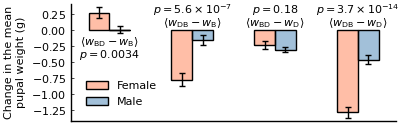

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

In [98]:
fig = plot(size=(400,125))

x = 1:4

Δw_f = [ΔwBD_B_f,ΔwDB_B_f,ΔwBD_D_f,ΔwDB_D_f]
Δw_m = [ΔwBD_B_m,ΔwDB_B_m,ΔwBD_D_m,ΔwDB_D_m]
ste_Δw_f = [ste_ΔwBD_B_f,ste_ΔwDB_B_f,ste_ΔwBD_D_f,ste_ΔwDB_D_f]
ste_Δw_m = [ste_ΔwBD_B_m,ste_ΔwDB_B_m,ste_ΔwBD_D_m,ste_ΔwDB_D_m]

bar!(fig,x,Δw_f,bar_width=0.25,
    fillcolor=:coral,
    fillalpha=0.5,
    grid=:off,
    xticks=[],
    ylabel="Change in the mean\npupal weight (g)",
    yguidefontsize=8,
    legend_background_color=false,
    legend=:bottomleft,
    label="Female")
bar!(fig,x.+0.25,Δw_m,bar_width=0.25,
    fillcolor=:steelblue,
    fillalpha=0.5,
    label="Male")

for i in 1:4
    plot!(fig,[x[i],x[i]],[(Δw_f .+ ste_Δw_f)[i],(Δw_f .- ste_Δw_f)[i]],label="",
        color=:black,
        marker=:hline)
    plot!(fig,[x[i],x[i]].+0.25,[(Δw_m .+ ste_Δw_m)[i],(Δw_m .- ste_Δw_m)[i]],label="",
        color=:black,
        marker=:hline)
end

annotate!(fig,[(1+0.125,-0.2,Plots.text(L"\langle w_{\mathsf{BD}}-w_{\mathsf{B}}\rangle",rotation=0,8)),
        (2+0.125,0.1,Plots.text(L"\langle w_{\mathsf{DB}}-w_{\mathsf{B}}\rangle",rotation=0,8)),
        (3+0.125,0.1,Plots.text(L"\langle w_{\mathsf{BD}}-w_{\mathsf{D}}\rangle",rotation=0,8)),
        (4+0.125,0.1,Plots.text(L"\langle w_{\mathsf{DB}}-w_{\mathsf{D}}\rangle",rotation=0,8))
        ])

annotate!(fig,[(1+0.125,-0.4,Plots.text(string(L"p=","0.0034"),rotation=0,8)),
        (2+0.125,0.3,Plots.text(string(L"p=",L"5.6\times10^{-7}"),rotation=0,8)),
        (3+0.125,0.3,Plots.text(string(L"p=","0.18"),rotation=0,8)),
        (4+0.125,0.3,Plots.text(string(L"p=",L"3.7\times10^{-14}"),rotation=0,8))
        ])

fig

In [99]:
dir_output = "$(dir_source_data)/Fig1/Fig1D"

fig_name = "Pupal_weight_change_in_the_mean"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
sys:1: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0, 1.0)) for an unfilled marker ('_').  Matplotlib is ignoring the edgecolor in 

# 6. *Heliconius* data revisited

In [100]:
using GLM

In [102]:
df = DataFrame(CSV.File("$(dir_source_data)/Fig4-Heliconius+S11C/dat.4.qtl.lumped.csv"));


In [103]:
chrs = df[13:end,2]
chrs = parse.(Int64,vcat(chrs[chrs.!="x"],repeat(["21"],sum(chrs.=="x"))))

coord = df[13:end,1]
x = getindex.(split.(coord,"_"),2)
coord = parse.(Int64,x)

map_cM = float.(df[13:end,3])

ind = (.! ismissing.(Array(df[11,:]) .== "male")) .& ((Array(df[11,:]) .== "male").== true)

genotype = Array(df[13:end,:])[:,ind]
phenotype_score = Array(df[8,:])[ind];
phenotype_stage = Array(df[9,:])[ind];
marker_name = df[13:end,1];
individual_name = Array(df[3,ind]);

#### 6.1. Scanning using r/qtl

In [105]:
R"""

library("qtl")

setwd(paste(dir_source_data,"/Fig4-Heliconius+S11C",sep=""))

heli = read.cross("csvs", "run.pheno_ovary", "rqtl.genotypes.csv", "rqtl.phenotypes.csv", alleles=c("A","B"), genotypes=c("AB","AA"))

heli <- calc.genoprob(heli)

out2 <- scantwo(heli,model="normal",pheno.col=c("ova_stage"), chr=c("21"),method="mr")

out1 <- scanone(heli,model="normal",pheno.col=c("ova_stage"), method="mr")
out1_perm <- scanone(heli,model="normal",pheno.col=c("ova_stage"), method="mr",n.perm = 1000)

#out2_perm <- scantwo(heli,model="normal",pheno.col=c("ova_stage"), chr=c("21"), n.perm = 2)

"""

println("Mapping finished!")

 --Read the following data:
	 86  individuals
	 880  markers
	 3  phenotypes
 --Cross type: bc 
 --Running scanone
 --Running scantwo
 (21,21)
Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 
Mapping fi

In [106]:
@rget out2
@rget out1
@rget out1_perm;

In [107]:
g = transpose(Array(genotype .!= "AA") .* 1/2 .+ Array(genotype .== "AA") .* 0);

g_all = Dict()
l_all = Dict()
for chr in 1:21
    g_all["$(chr)"] = g[:,chrs .== chr]
    l_all["$(chr)"] = coord[chrs .== chr]
end

pmap = l_all["21"];
gmap = out2[:map][:,2];
LOD = out2[:lod];

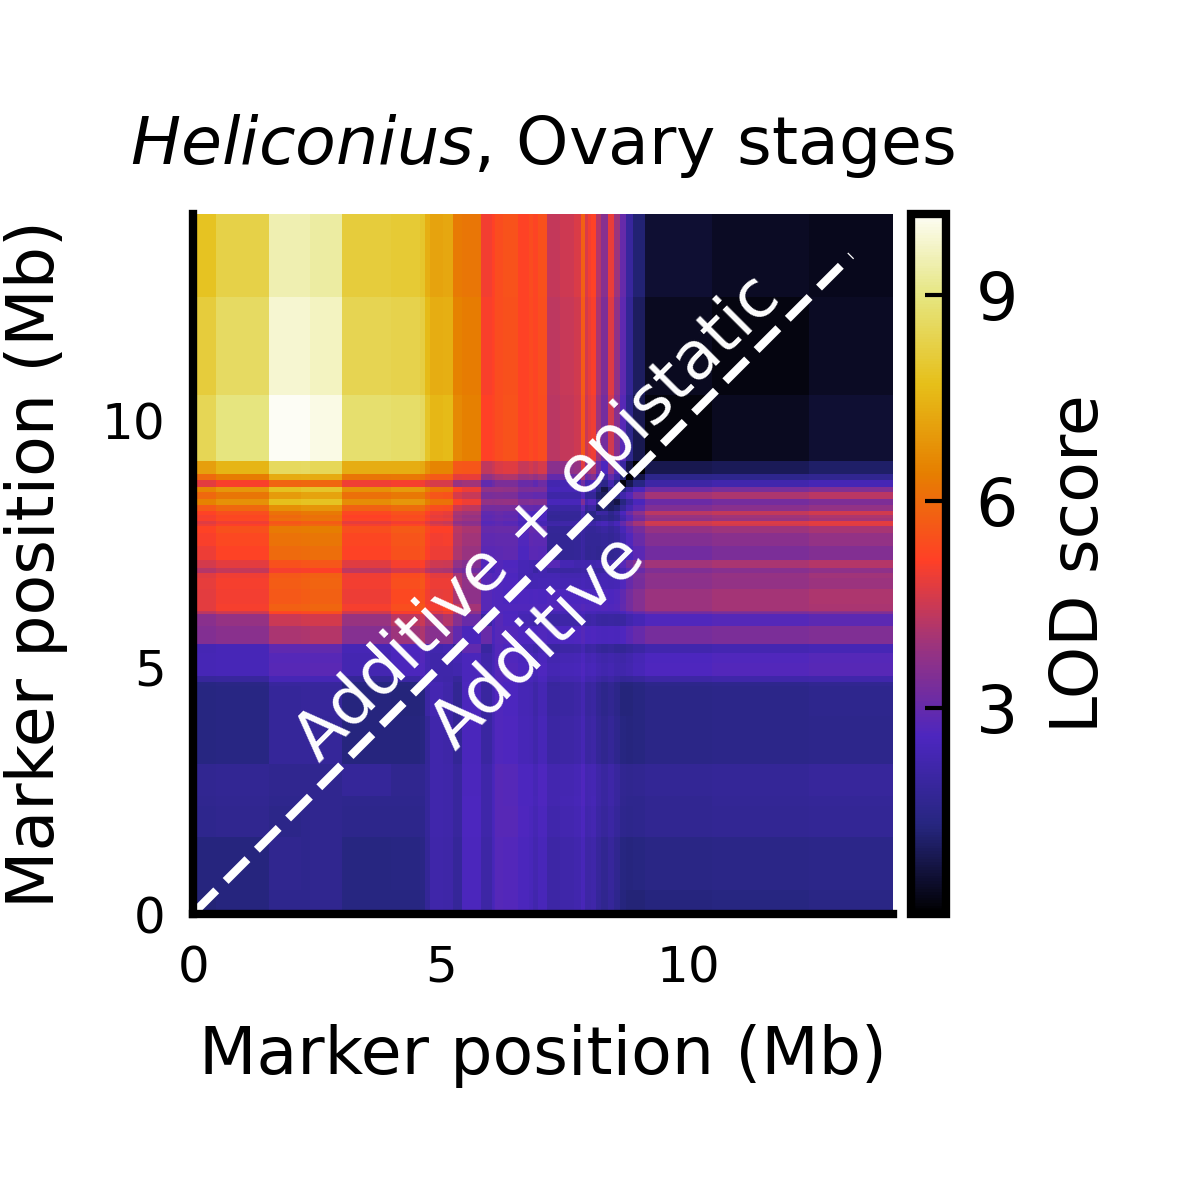

In [108]:
fig = plot(size=(200,200),dpi=600)

heatmap!(fig,
    pmap./1e6,pmap./1e6,LOD,
    color=cgrad(:CMRmap,rev=false),
    aspect_ratio=1,
    label="",
    xticks=[0,5,10],
    xlims=(0,+Inf),
    ylims=(0,+Inf),
    yticks=[0,5,10],
    xlabel=string("Marker position (Mb)"),
    ylabel=string("Marker position (Mb)"),
    xguidefontsize=8,
    yguidefontsize=8,
    ytickfontsize=6,
    xtickfontsize=6,
    title=string(L"Heliconius",", Ovary stages"),
    colorbar_title="LOD score",
    colorbar_titlefontsize=8,
    titlefontsize=8,
    colorbar_ticks=0:3:12,   
)

plot!(fig,
    (pmap./1e6)[[1,end]],(pmap./1e6)[[1,end]],
    label="",
    color=:white,
    linestyle=:dash,
)

annotate!(fig,
    [(7,8,Plots.text("Additive + epistatic",8,rotation=45,:white)),
    (7,5.5,Plots.text("Additive",8,rotation=45,:white))
    ]
)

In [109]:
dir_output = "$(dir_source_data)/Fig4-Heliconius+S11C"

fig_name = "2d.lod_score_LastStageOogenesis"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

In [110]:
markersizes = []
pmap_all = Dict()
for chr in 1:21
    push!(markersizes,sum(Array(out1[:,1]).=="$(chr)"))
    pmap_all["$(chr)"] = Array(out1[:,2])[Array(out1[:,1]).=="$(chr)"]
end
marker_idx_range = vcat([0],cumsum(markersizes));

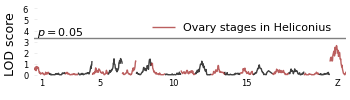

In [111]:
fig = plot(size=(350,100))
colors=[:black,:brown]
for chr in 1:21
    
    if chr == 1
        pos = pmap_all["$(chr)"]
    else
        pos = pmap_all["$(chr)"] .+ sum([pmap_all["$(i)"][end] for i in 1:(chr-1)])
    end

    plot!(fig,pos,out1[marker_idx_range[chr]+1:marker_idx_range[chr+1],3],
        label=chr==1 ? "Ovary stages in Heliconius" : "",
        legendfontsize=8,
        legend=:topright,
        legend_background_color=false,
        linecolor=colors[chr%2+1],
        linestyle=:solid,
        xticks=[],
        linewidth=1,
        linealpha=0.75,
        ylims=(-0.5,6),
        xlims=(-Inf,+Inf),
        grid=:off,
        ylabel="LOD score",
        yguidefontsize=9,
        xguidefontsize=9,
        ytickfontsize=6,
        framestyle=:grid,
        bottom_margin=0.5cm,
        )

    if any(chr .== [1,5,10,15,21])
        annotate!(fig,[(mean([pos[1],pos[end]]),-0.75,Plots.text(chr!=21 ? "$(chr)" : "Z",6))])
    end
    if chr == 20
        # annotate!(fig,[(pos[end]/2,-1.2,Plots.text("Chromosomes",8))])
    end
end

hline!(fig,[quantile(out1_perm[:],0.95)],
    linecolor=:gray,
    linewidth=1,
    label="",
    linestyle=:solid)

lod_threshold_1 = string(round(quantile(out1_perm[:],0.95);digits=2))

annotate!(fig,[(10,3.75,Plots.text(string(L"p=0.05"),8,:left))])


fig

In [112]:
quantile(out1_perm[:],0.95)

3.3012818904019055

In [113]:
dir_output = "$(dir_source_data)/Fig4-Heliconius+S11C"

fig_name = "1d.lod_score_LastStageOogenesis"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

#### 6.2. Manually analyzing associations

In [114]:
g = transpose(Array(genotype .!= "AA") .* 1/2 .+ Array(genotype .== "AA") .* 0);

In [115]:
g_all = Dict()
l_all = Dict()
for chr in 1:21
    g_all["$(chr)"] = g[:,chrs .== chr]
    l_all["$(chr)"] = coord[chrs .== chr]
end

# remove the last marker from chr19 as it is from a separate scaffold

l_all["19"] = l_all["19"][1:end-1]
g_all["19"] = g_all["19"][:,1:end-1];

# then, drop the last marker to be the chromosome end on each chromosome
# and delete the last marker on genotypes and coordinates

chr_size = [l_all["$i"][end] for i in 1:21]

for chr in 1:21
    g_all["$(chr)"] = g_all["$(chr)"][:,1:end-1]
    l_all["$(chr)"] = l_all["$(chr)"][1:end-1]
end

In [116]:
function get_ancestry_chrs(chr_list,g_all,l_all,chr_size)
    chr = chr_list[1]
    cumulative_anc = zeros(size(g_all["$(chr)"])[1])
    L = 0
    for chr in chr_list
        δl = vcat(l_all["$(chr)"][2:end],[chr_size[chr]]) .- l_all["$(chr)"]
        cumulative_anc = cumulative_anc .+ g_all["$(chr)"] * (δl)
        L = L + sum(δl)
    end
    return cumulative_anc ./ L
end

get_ancestry_chrs (generic function with 1 method)

In [117]:
anc_A = get_ancestry_chrs(1:20,g_all,l_all,chr_size)
anc_Z = get_ancestry_chrs([21],g_all,l_all,chr_size) .* 2;

In [118]:
p = parse.(Float64,phenotype_stage) # scored between 0 and 8;

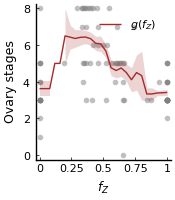

In [119]:
xdata = anc_Z 
ydata = p

q0=[0,0,0.5]

wid = 0.2
x_l = -0.1:wid/5:0.9
x_r = x_l .+ wid

x_mid = (x_r.+x_l)/2
ymean = [mean(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
yste = begin
    
    σ = [std(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
    n = [length(ydata[(xdata .<= x_r[i]) .& (xdata .> x_l[i])]) for i in 1:size(x_l)[1]]
    σ ./ sqrt.(n)
end

x_mid = x_mid[.!isnan.(ymean)]
yste = yste[.!isnan.(ymean)]
ymean = ymean[.!isnan.(ymean)]


fig = plot(size=(175,200))
scatter!(fig,anc_Z,p,
    xlabel=L"f_Z",
    ylabel="Ovary stages",
    # ylabel="Ovary score",
    # title=L"Heliconius",
    titlefontsize=9,
    xticks=([0,0.25,0.5,0.75,1],["0","0.25","0.5","0.75","1"]),
    # xlims=(-Inf,+Inf),
    xguidefontsize=9,
    yguidefontsize=9,
    label="",
    markeralpha=0.5,
    markercolor=:gray,
    grid=:off,
    markerstrokewidth=0)

# plot!(-0.35:0.01:0.85,f(-0.35:0.01:0.85,coef(fit)),
#     color=:gray,
#     linestyle=:solid,
#     label="")

plot!((x_r.+x_l)/2,ymean,
    color=:brown,
    legend=:topright,
    legend_background_color=false,
    linestyle=:solid,
    label=L"g(f_Z)")

plot!((x_r.+x_l)/2,ymean.+yste,
    fillrange=ymean.-yste,
    fillcolor=:brown,
    fillalpha=0.2,
    linewidth=0,label="")

In [120]:
dir_output = "$(dir_source_data)/Fig4-Heliconius+S11C"

fig_name = "LastStageOogenesis_ancZ_relation"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

#### 6.3. Extract and analyze $g(f_Z)$

In [121]:
function g_heli(f;x_mid,ymean)
    
    Δ = abs.(f .- x_mid)
    s = minimum(abs.(f .- x_mid))
    
    return ymean[findfirst(x->x==s,Δ)]
   
end

# function to get ancestry for a particular marker at relative position l

anc(l,f,side) = begin
    
    if f*(1-f)==0
        
        return f
        
    else
        
        return side == 1 ? (l<=f)*1 : (l>=f)*1
        
    end
    
end

# function to get ancestry for a pair of markers at relative position l1 and l2

anc_2(l1,l2,f,side) = begin
    
    if f*(1-f)==0
        
        return [f,f]
        
    else
    
        if side == 1
            # introgress from the left end 
            [l1<=f,l2<=f] .* 1     
        else
            # introgress from the right end
            [l1>=f,l2>=f] .* 1     
        end
        
    end
end

# function to get average ancestry for the chromosome

get_anc_Z(f,side) = begin
    
    if f*(1-f) == 0
        return f
    else
        return side == 1 ? f : (1-f)
    end
    
end


get_anc_Z (generic function with 1 method)

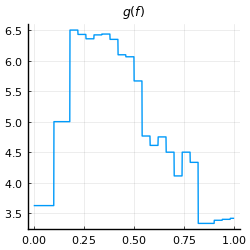

In [122]:
# inspect g_heli(f)
x=0:0.001:1
fig = plot(size=(250,250))

plot!(fig,x,g_heli.(x;x_mid=x_mid,ymean=ymean),
    label="",
    title=L"g(f)",
    titlefontsize=9,
    )

In [123]:
# sample size
N = 86

# total numbers of independent simulations
n_repeats = 1000

L = 0.001:0.001:0.999 # relative positions

R2_1marker_additive_all = zeros(length(L),0)

@showprogress 1 for n in 1:n_repeats

    # random breakpoints
    f = begin
        X = []
        for i in 1:N
            if rand(1)[1] <= 0.5           
                x = rand([0,1])
            else
                x = rand(1)
            end
            append!(X,x)
        end
        X
    end

    # random sides

    s = ((rand(N) .<=0.5) * 1).+1

    # get phenotype

    P = g_heli.(get_anc_Z.(f,s);x_mid=x_mid,ymean=ymean);
    # P = p_2QTL.(anc_2.(0.1,0.9,f,s));

    # get chromosomal ancestry

    fZ = get_anc_Z.(f,s);
    
    R2_1marker_additive = []

    # R2_Z_ancestry = (cor(fZ,P))^2

    for l in L

        a = [anc(l,f[i],s[i]) for i in 1:N]
        append!(R2_1marker_additive,(cor(a,P))^2)

    end
    
    R2_1marker_additive_all = hcat(R2_1marker_additive_all,R2_1marker_additive)
    
    # print(var(p_modal.(fZ,0.1)))
    
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:12


In [124]:
pos_Z = l_all["21"]

R2_1qtl = []
for i in 1:size(g_all["21"])[2]
    data = DataFrame(y = p, x_Z = g_all["21"][:,i].*2)
    push!(R2_1qtl, r2(lm(@formula(y ~ x_Z),data)))
end

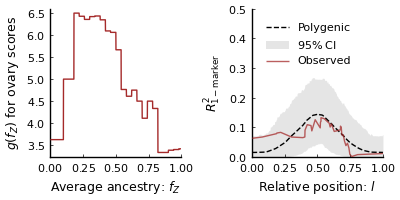

In [125]:
fig = plot(size=(400,200),layout=(1,2))


upper_quantile = [quantile(R2_1marker_additive_all[i,:],0.975) for i in 1:length(L)]
lower_quantile = [quantile(R2_1marker_additive_all[i,:],0.025) for i in 1:length(L)]

plot!(fig,L,mean(R2_1marker_additive_all;dims=2),
    label="Polygenic",
    xlabel=string("Relative position: ",L"l"),
    xlabelfontsize=9,
    linecolor=:black,
    linestyle=:dash,
    alpha=1,
    # yticks=0:0.2:1.25,
    # title="",
    # titlefontsize=10,
    ylabel=L"R^2_{\mathrm{1-marker}}",
    ylabelfontsize=9,
    ylims=(0,0.5),
    xticks=[0,0.25,0.5,0.75,1],
    xlims=(0,1),
    subplot=2,
    )

plot!(fig,L,upper_quantile,
    fill_between = lower_quantile,
    fillcolor=:black,
    fillalpha=0.1,
    label=L"95\%\;\mathrm{CI}",
    linewidth=0,
    # yticks=0:0.2:1.25,
    # ylims=(0,1.25),
    subplot=2,
    )

plot!(fig,L,g_heli.(L;x_mid=x_mid,ymean=ymean),
    label="",
    xlims=(0,1),
    xticks=[0,0.25,0.5,0.75,1],
    # ylims=(0,1),
    ylabel=string(L"g(f_Z)"," for ovary scores"),
    xlabel=string("Average ancestry: ",L"f_Z"),
    xlabelfontsize=9,
    ylabelfontsize=9,
    subplot=1,
    linecolor=:brown,
    grid=:off,
    )

plot!(fig,pos_Z./pos_Z[end],R2_1qtl,
    label="Observed",
    color=:brown,
    grid=:off,
    alpha=0.75,
    legend_background_color=false,
    legend=:topleft,
    subplot=2
)

fig

In [126]:
dir_output = "$(dir_source_data)/Fig4-Heliconius+S11C"

fig_name = "LastStageOogenesis_gfZ_prediction"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

In [127]:
# sample size
N = 86

# total numbers of independent simulations
n_repeats = 100

dl = 0.01
L = 0.01:dl:0.99
# R2_2qtl_additive = zeros(size(L)[1],size(L)[1])

R2_2qtl_v0_all = zeros(size(L)[1],size(L)[1],0)
R2_2qtl_v1_all = zeros(size(L)[1],size(L)[1],0)

@showprogress 1 for n in 1:n_repeats

    # random breakpoints
    f = begin
        X = []
        for i in 1:N
            if rand(1)[1] <= 0.5           
                x = rand([0,1])
            else
                x = rand(1)
            end
            append!(X,x)
        end
        X
    end

    # random sides

    s = ((rand(N) .<=0.5) * 1).+1

    # get phenotype

    P = g_heli.(get_anc_Z.(f,s);x_mid=x_mid,ymean=ymean);
    # P = p_2QTL.(anc_2.(0.1,0.9,f,s));

    R2_2qtl_v0 = zeros(size(L)[1],size(L)[1]).*NaN
    R2_2qtl_v1 = zeros(size(L)[1],size(L)[1]).*NaN
    
    i = 1
    for l1 in L
        j = 1
        for l2 in L[1]:dl:l1
            a = [anc_2(l1,l2,f[i],s[i]) for i in 1:N]
            a = vcat((transpose(a))...)

            data = DataFrame(y = P, x1 = 2 .* a[:,1] .- 1, x2=2 .* a[:,2] .- 1)
            ols_sq = lm(@formula(y ~ 1 + x1 + x2 + x1 & x2), data);
            R2_2qtl_v0[i,j] = r2(ols_sq)     
            # α12_2qtl_v0[i,j] = coef(ols_sq)[2]


            data = DataFrame(y = P, x1 = 2 .* a[:,1] .- 1, x2=2 .* a[:,2] .- 1)
            ols_sq = lm(@formula(y ~ 1 + x1 + x2), data);
            R2_2qtl_v1[i,j] = r2(ols_sq)     
            # α12_2qtl_v1[i,j] = coef(ols_sq)[4]

            j = j+1
        end
        i = i+1
    end
    
    R2_2qtl_v0_all = cat(R2_2qtl_v0_all,R2_2qtl_v0;dims=3)
    R2_2qtl_v1_all = cat(R2_2qtl_v1_all,R2_2qtl_v1;dims=3)
    
    # print(var(p_modal.(fZ,0.1)))
    
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:04


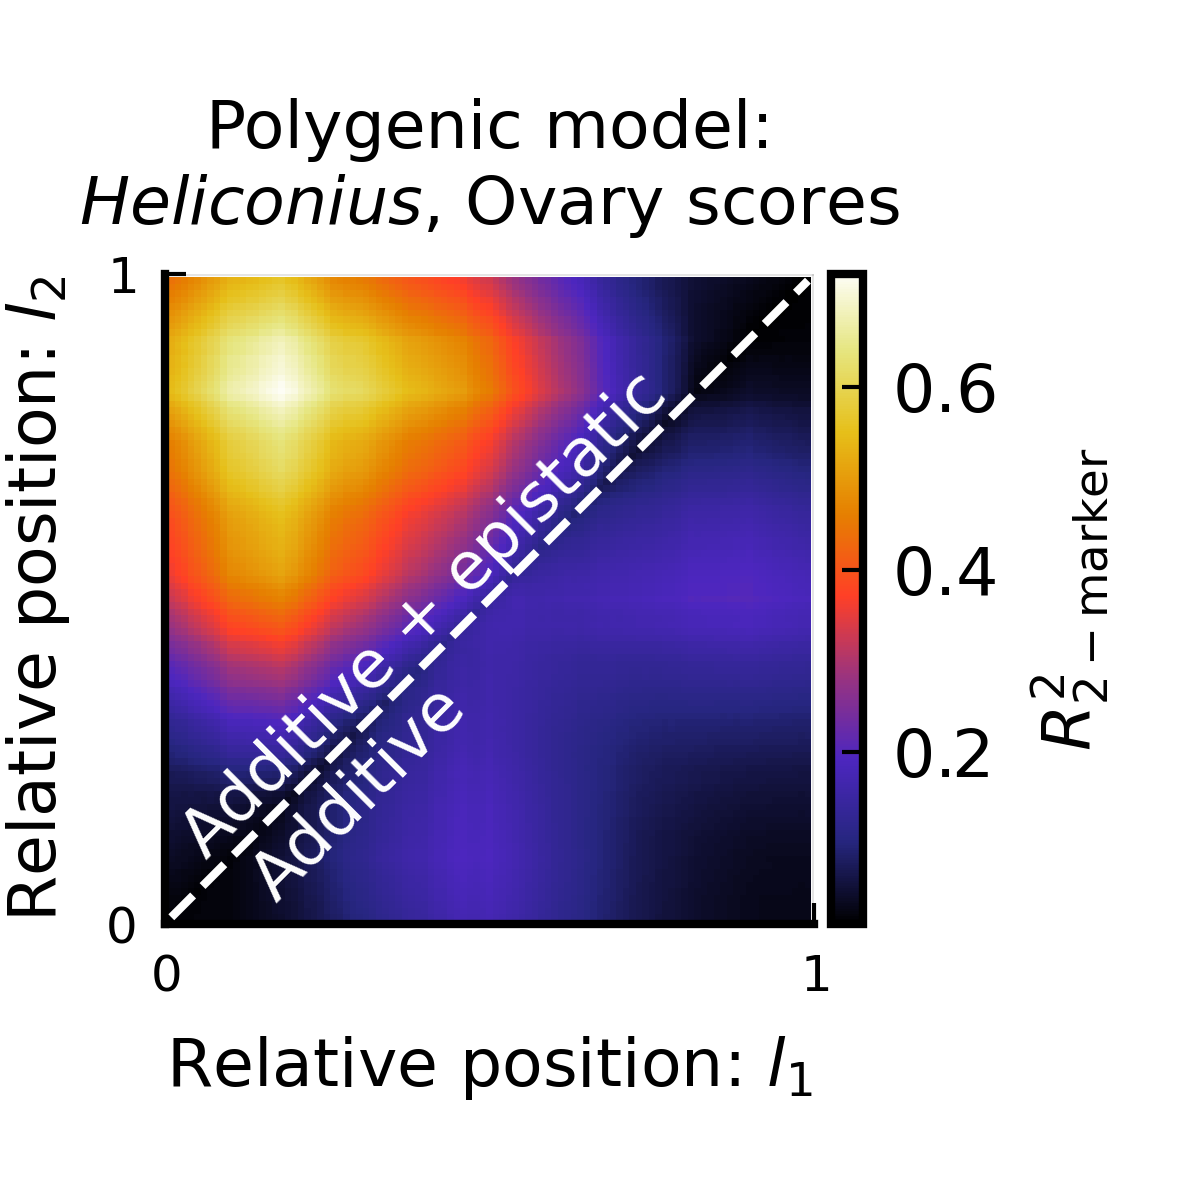

In [128]:
R2_v0_mean = dropdims(mean(R2_2qtl_v0_all;dims=3);dims=3)
R2_v1_mean = dropdims(mean(R2_2qtl_v1_all;dims=3);dims=3)

fig = plot(size=(200,200),dpi=600)

heatmap!(fig,
    L,L,R2_v0_mean,
    color=cgrad(:CMRmap,rev=false),
    aspect_ratio=1,
    label="",
    xticks=[0,1],
    xlims=(0,+Inf),
    ylims=(0,+Inf),
    yticks=[0,1],
    xlabel=string("Relative position: ",L"l_1"),
    ylabel=string("Relative position: ",L"l_2"),
    xguidefontsize=8,
    yguidefontsize=8,
    ytickfontsize=6,
    xtickfontsize=6,
    title=string("Polygenic model:\n",L"Heliconius",", Ovary scores"),
    colorbar_title=L"R^2_{2-\mathrm{marker}}",
    colorbar_titlefontsize=8,
    titlefontsize=8,
    colorbar_ticks=0:0.2:1,   
)

heatmap!(fig,
    L,L,transpose(R2_v1_mean),
    color=cgrad(:CMRmap,rev=false),
    aspect_ratio=1,
    label="",
    xticks=[0,1],
    xlims=(0,1),
    ylims=(0,1),
    yticks=[0,1],
    xlabel=string("Relative position: ",L"l_1"),
    ylabel=string("Relative position: ",L"l_2"),
    xguidefontsize=8,
    yguidefontsize=8,
    ytickfontsize=6,
    xtickfontsize=6,
    title=string("Polygenic model:\n",L"Heliconius",", Ovary scores"),
    colorbar_title=L"R^2_{2-\mathrm{marker}}",
    colorbar_titlefontsize=8,
    titlefontsize=8,
    colorbar_ticks=0:0.2:1,   
)

plot!(fig,
    L,L,
    label="",
    color=:white,
    linestyle=:dash,
)

annotate!(fig,
    [(0.4,0.475,Plots.text("Additive + epistatic",8,rotation=45,:white)),
    (0.3,0.2,Plots.text("Additive",8,rotation=45,:white))
    ]
)

In [129]:
dir_output = "$(dir_source_data)/Fig4-Heliconius+S11C"

fig_name = "LastStageOogenesis_gfZ_2marker_prediction"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))

#### 6.4. Plot ancestry haplotypes

In [130]:
p = parse.(Float64,phenotype_stage); # scored between 0 and 8

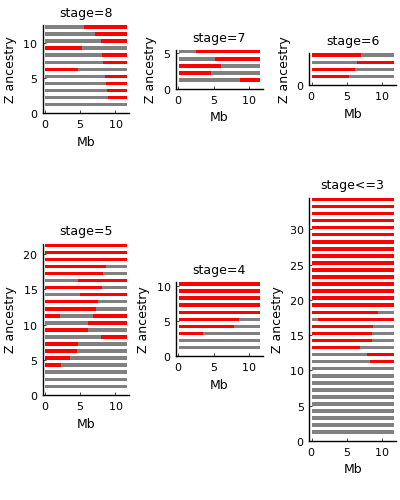

In [131]:
l= @layout[a{0.25h} b c;d e f]

fig = plot(size=(400,500),layout=l)
    
idx_1 = (p.>=8) .& (p.<= 8)
idx_2 = (p.>=7) .& (p.<= 7)
idx_3 = (p.>=6) .& (p.<= 6)
idx_4 = (p.>=5) .& (p.<= 5)
idx_5 = (p.>=4) .& (p.<= 4)
idx_6 = (p.>=0) .& (p.<= 3)

idx = hcat(idx_1,idx_2,idx_3,idx_4,idx_5,idx_6)

titles=["stage=8",
    "stage=7",
    "stage=6",
    "stage=5",
    "stage=4",
    "stage<=3",    
]

for j in 1:6

    g_filt = g_all["21"][idx[:,j],:]
    
    anc_Z_sort = sortperm(mean(g_filt;dims=2)[:])
    
    g_filt = g_filt[anc_Z_sort,:]

    for i in 1:size(g_filt)[1]

        plot!(fig,l_all["21"]./1e6,[0.5].+i,
            label="",
            aspect_ratio=1,
            seriestype=:steppre,
            fillcolor=:gray,
            linewidth=0,
            subplot=j,
            title=titles[j],
            titlefontsize=9,
            xlabel="Mb",
            xticks=[0,5,10],
            ylims=(0,+Inf),
            ylabel="Z ancestry",
            yticks=[0,5,10,15,20,25,30],
            xguidefontsize=9,
            yguidefontsize=9,
            fillrange=0+i)

        plot!(fig,l_all["21"]./1e6,g_filt[i,:].+i,
            label="",
            aspect_ratio=1,
            seriestype=:steppre,
            fillcolor=:red,
            fillrange=0+i,
            grid=:off,
            subplot=j,
            linewidth=0,
            )

    end
    
end

fig

In [132]:
dir_output = "$(dir_source_data)/Fig4-Heliconius+S11C"

fig_name = "LastStageOogenesis_ancestry_blocks_ChrZ_red_introgressed"

savefig(fig,string("$(dir_output)/$(fig_name).png"))
savefig(fig,string("$(dir_output)/$(fig_name).pdf"))